# Import packages

In [190]:
import scipy.interpolate as spl
from matplotlib.pyplot import figure, show
import numpy as np
import warnings
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# Model definition

# Center of the galaxy (r = 0)

## Runge-Kutta solution for $\Sigma_{gas}$

### $$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{C}{2 \pi r_{acc}^2} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$$

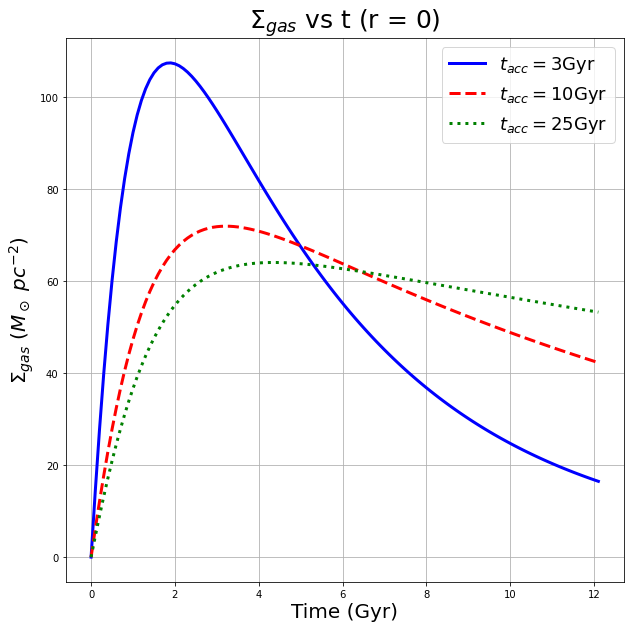

In [191]:
def dydx1(t,S):
    return (C/(2*np.pi*(r_acc**2)))*np.exp(-t/t_acc)*np.exp(-r/r_acc)-A*(1-Rf)*(S**N) #replace with function to be solved

def dydx2(x, y):
    return x+y

def RungeKutta(x, y, dx, dydx):
    """
    Runge-Kutta method to solve differential equations.
    
    x = (initial) x values
    y = (initial) y values
    dx = step size
    dydx = differential equation
    """
    # Calculate slopes
    k1 = dx*dydx(x, y)
    k2 = dx*dydx(x+dx/2., y+k1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2.)
    k4 = dx*dydx(x+dx, y+k3)
    
    # Calculate new x and y
    y = y + 1./6*(k1+2*k2+2*k3+k4)
    x = x + dx
    
    return x, y

Mbar = 10**10
r_acc = 1000*(10**(0.385*(np.log10(Mbar)-10)+0.281)) #1.9 Kpc
N = 1.4 #below
A = 0.1625 # with N above used in K-S law
Rf = 0.3 #return factor
r = 0 #set

x0 = 0
y0 = 0
dx = 0.1
x_end = 12

x_rk1 = [x0]
y_rk1 = [y0]
x_rk2 = [x0]
y_rk2 = [y0]
x_rk3 = [x0]
y_rk3 = [y0]

t_acc = 3
C = Mbar/(t_acc*(1-np.exp(-12/t_acc))) #
y = y0
x = x0
while x <= x_end:
   
    x, y = RungeKutta(x, y, dx, dydx1)

    x_rk1.append(x)
    y_rk1.append(y)

t_acc = 10
C = Mbar/(t_acc*(1-np.exp(-12/t_acc))) #1431012760.6933334
y = y0
x = x0
while x <= x_end:

    x, y = RungeKutta(x, y, dx, dydx1)

    x_rk2.append(x)
    y_rk2.append(y)
    
t_acc = 25
C = Mbar/(t_acc*(1-np.exp(-12/t_acc))) #
y = y0
x = x0
while x <= x_end:

    x, y = RungeKutta(x, y, dx, dydx1)

    x_rk3.append(x)
    y_rk3.append(y)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(x_rk1, y_rk1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(x_rk2, y_rk2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(x_rk3, y_rk3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$\Sigma_{gas}$ vs t (r = 0)", fontsize = 25) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 20)
frame.set_ylabel(r"$\Sigma_{gas}$ $(M_\odot\ pc^{-2})$", fontsize = 20)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/gas surface density vs time (r=0).png')

Explanation:



## Plot for $\Sigma_{rSFR}$

###  Kenicutt–Schmidt law $$\Sigma_{rSFR} = A(1-\Re)\Sigma_{gas}^N (t,R)$$

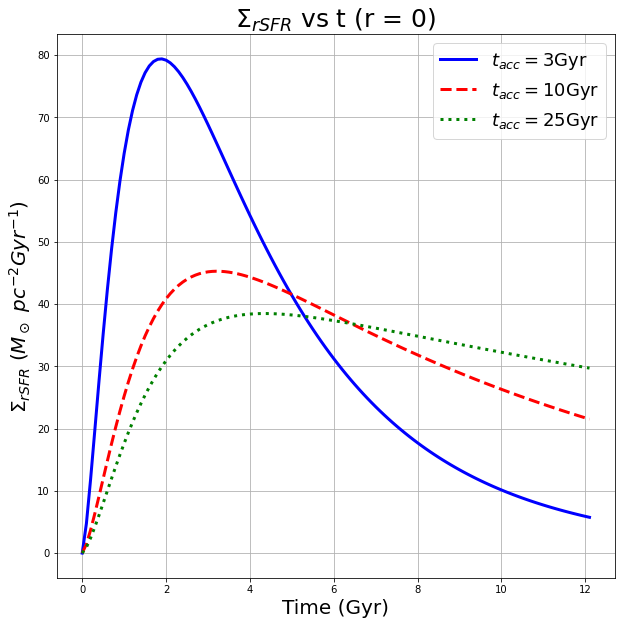

In [192]:
N = 1.4 #below
A = 0.1625 # with N above used in K-S law
Rf = 0.3 #return factor

y_sfr1 = A*(1-Rf)*np.array(y_rk1)**N
y_sfr2 = A*(1-Rf)*np.array(y_rk2)**N
y_sfr3 = A*(1-Rf)*np.array(y_rk3)**N

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(x_rk1, y_sfr1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(x_rk2, y_sfr2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(x_rk3, y_sfr3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$\Sigma_{rSFR}$ vs t (r = 0)", fontsize = 25) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 20)
frame.set_ylabel(r"$\Sigma_{rSFR}$ $(M_\odot\ pc^{-2} Gyr^{-1})$", fontsize = 20)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/star formation rate surface density vs time (r=0).png')

Explanation:



## Riemann sum solution for $\Sigma_{\star}$

### $$\Sigma_{\star} = A(1-\Re) \int_{0}^{t} \Sigma_{gas}^N (t',R) \,dt' = \int_{0}^{t} \Sigma_{rSFR} (t',R) \,dt'$$

Intergral solved with a Riemann sum

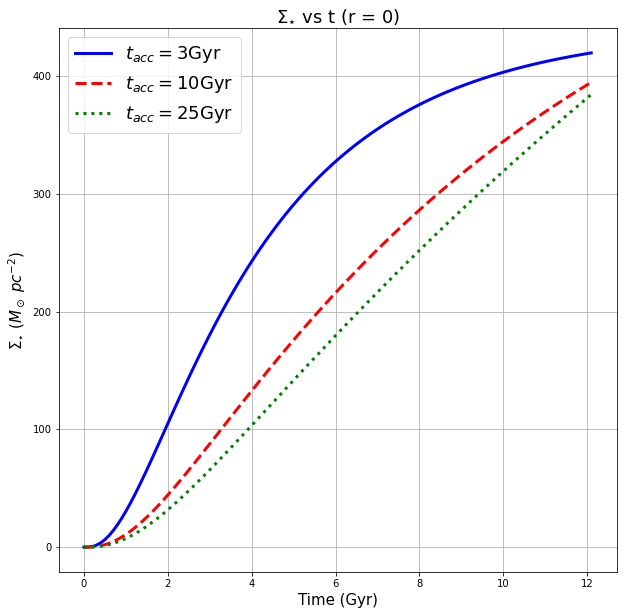

In [193]:
a = 0
dt = 0.1

y_s1 = []
for i in range(len(x_rk1)):
    y_s1.append(dt*np.sum(y_sfr1[:i]))
    
y_s2 = []
for i in range(len(x_rk2)):
    y_s2.append(dt*np.sum(y_sfr2[:i]))
    
y_s3 = []
for i in range(len(x_rk3)):
    y_s3.append(dt*np.sum(y_sfr3[:i]))

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(x_rk1, y_s1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(x_rk2, y_s2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(x_rk3, y_s3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$\Sigma_{\star}$ vs t (r = 0)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$\Sigma_{\star}$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/star surface density vs time (r=0).png')

Explanation:



## $$\Sigma_{bar}$$

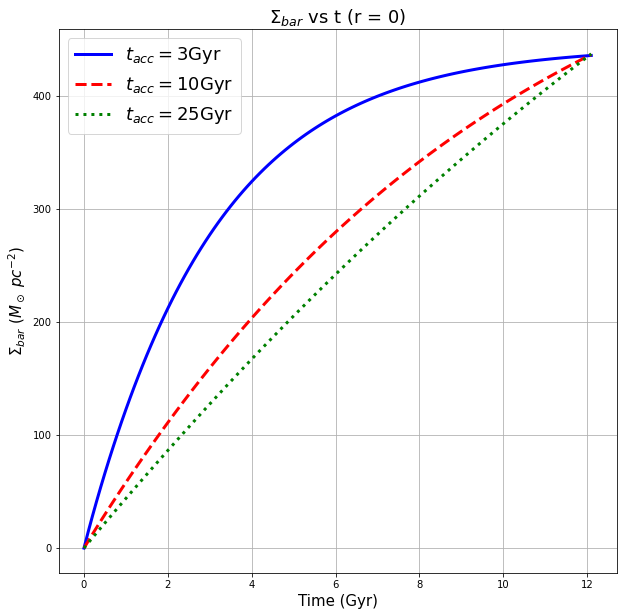

In [194]:
y_bar1 = [np.sum(x) for x in zip(y_s1, y_rk1)]
y_bar2 = [np.sum(x) for x in zip(y_s2, y_rk2)]
y_bar3 = [np.sum(x) for x in zip(y_s3, y_rk3)]

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(x_rk1, y_bar1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(x_rk2, y_bar2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(x_rk3, y_bar3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$\Sigma_{bar}$ vs t (r = 0)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$\Sigma_{bar}$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/baryonic surface density vs time (r=0).png')

Explanation:



## $f_{gas} (t)$ 

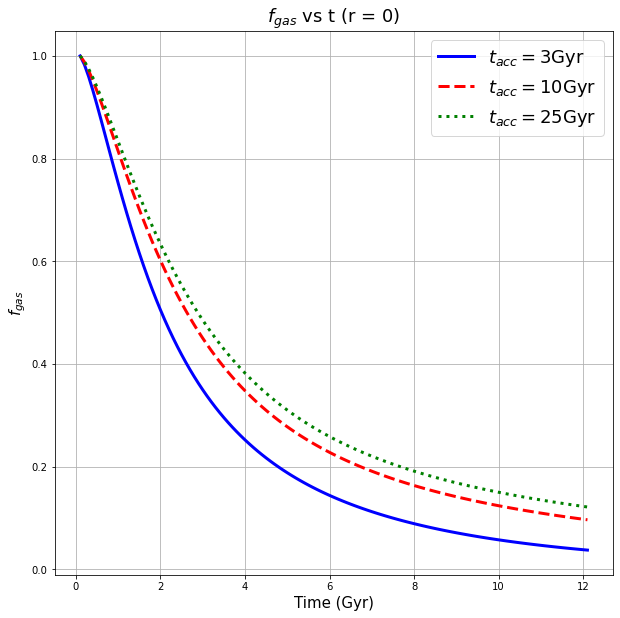

In [195]:
warnings.filterwarnings('ignore')

f_gas1 = np.divide(y_rk1, y_bar1)
f_gas2 = np.divide(y_rk2, y_bar2)
f_gas3 = np.divide(y_rk3, y_bar3)
#print(f_gas1)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(x_rk1, f_gas1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(x_rk2, f_gas2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(x_rk3, f_gas3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$f_{gas}$ vs t (r = 0)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/f_gas surface density vs time (r=0).png')

In [196]:
warnings.filterwarnings('default')

First element of lists is 0, so outputs nans

An "ignore filterwarnings" command was introduced for aesthetical purposes

# Plots with varying R

## $log(\Sigma_{gas})$ vs r

### $t_{acc} = 3Gyr$

In [197]:
Mbar = 10**10
r_acc = 1000*(10**(0.385*(np.log10(Mbar)-10)+0.281)) #1.9 Kpc
N = 1.4 #below
A = 0.1625 # with N above used in K-S law
Rf = 0.3 #return factor
t_acc = 3
C = Mbar/(t_acc*(1-np.exp(-12/t_acc)))

r = np.arange(0,1000*25.1,10)

M_t = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))
M_sigma1 = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))

for i,r_value in enumerate(r):
    def dydx(t,S):
        return (C/(2*np.pi*(r_acc**2)))*np.exp(-t/t_acc)*np.exp(-r_value/r_acc)-A*(1-Rf)*(S**N)
    #print(r_value)
    x0 = 0
    y0 = 0
    dx = 0.1
    x_end = 12
    
    S_1 = np.zeros(len(x_rk2))
    t_1 = np.zeros(len(x_rk2))

    y = y0
    x = x0
    j=1
    while x <= x_end:

        x, y = RungeKutta(x, y, dx, dydx)
        #print(x,y)
        t_1[j] = np.round(x,1)
        S_1[j] = y
        j+=1
    
    M_t[i,:] = t_1
    M_sigma1[i,:] = S_1

#print(M_t, M_sigma)
row = M_t[0]
index1 = np.where(np.round(row,1) == 3.0)[0] #30
M_sigma_11 = M_sigma1[:,index1]
index2 = np.where(np.round(row,1) == 6.0)[0] #30
M_sigma_21 = M_sigma1[:,index2]
index3 = np.where(np.round(row,1) == 9.0)[0] #30
M_sigma_31 = M_sigma1[:,index3]
index4 = np.where(np.round(row,1) == 12.0)[0] #30
M_sigma_41 = M_sigma1[:,index4]
#print(M_sigma_11)

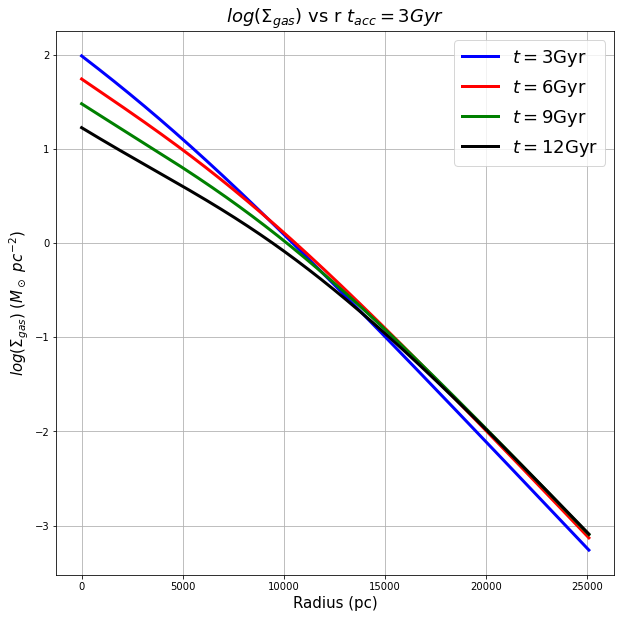

In [198]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_sigma_11), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_sigma_21), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_sigma_31), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_sigma_41), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{gas})$ vs r $t_{acc} = 3Gyr$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/gas surface density vs r (t_acc=3).png')

### $t_{acc} = 10Gyr$

In [199]:
Mbar = 10**10
r_acc = 1000*(10**(0.385*(np.log10(Mbar)-10)+0.281)) #1.9 Kpc
N = 1.4 #below
A = 0.1625 # with N above used in K-S law
Rf = 0.3 #return factor
t_acc = 10
C = Mbar/(t_acc*(1-np.exp(-12/t_acc)))

r = np.arange(0,1000*25.1,10)

M_t = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))
M_sigma2 = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))

for i,r_value in enumerate(r):
    def dydx(t,S):
        return (C/(2*np.pi*(r_acc**2)))*np.exp(-t/t_acc)*np.exp(-r_value/r_acc)-A*(1-Rf)*(S**N)
    #print(r_value)
    x0 = 0
    y0 = 0
    dx = 0.1
    x_end = 12
    
    S_1 = np.zeros(len(x_rk2))
    t_1 = np.zeros(len(x_rk2))

    y = y0
    x = x0
    j=1
    while x <= x_end:

        x, y = RungeKutta(x, y, dx, dydx)
        #print(x,y)
        t_1[j] = np.round(x,1)
        S_1[j] = y
        j+=1
    
    M_t[i,:] = t_1
    M_sigma2[i,:] = S_1

#print(M_t, M_sigma)
row = M_t[0]
index1 = np.where(np.round(row,1) == 3.0)[0] #30
M_sigma_12 = M_sigma2[:,index1]
index2 = np.where(np.round(row,1) == 6.0)[0] #30
M_sigma_22 = M_sigma2[:,index2]
index3 = np.where(np.round(row,1) == 9.0)[0] #30
M_sigma_32 = M_sigma2[:,index3]
index4 = np.where(np.round(row,1) == 12.0)[0] #30
M_sigma_42 = M_sigma2[:,index4]
#print(M_sigma_11)

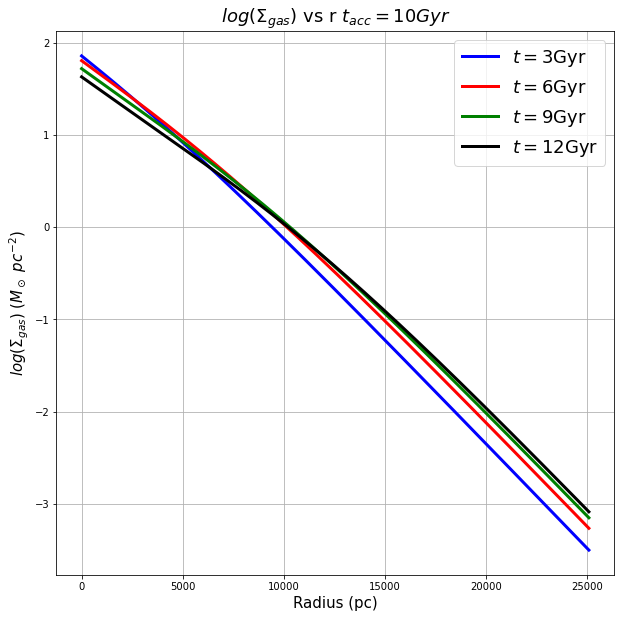

In [200]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_sigma_12), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_sigma_22), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_sigma_32), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_sigma_42), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{gas})$ vs r $t_{acc} = 10Gyr$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/gas surface density vs r (t_acc=10).png')

### $t_{acc} = 25Gyr$

In [201]:
Mbar = 10**10
r_acc = 1000*(10**(0.385*(np.log10(Mbar)-10)+0.281)) #1.9 Kpc
N = 1.4 #below
A = 0.1625 # with N above used in K-S law
Rf = 0.3 #return factor
t_acc = 25
C = Mbar/(t_acc*(1-np.exp(-12/t_acc)))

r = np.arange(0,1000*25.1,10)

M_t = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))
M_sigma3 = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))

for i,r_value in enumerate(r):
    def dydx(t,S):
        return (C/(2*np.pi*(r_acc**2)))*np.exp(-t/t_acc)*np.exp(-r_value/r_acc)-A*(1-Rf)*(S**N)
    #print(r_value)
    x0 = 0
    y0 = 0
    dx = 0.1
    x_end = 12
    
    S_1 = np.zeros(len(x_rk2))
    t_1 = np.zeros(len(x_rk2))

    y = y0
    x = x0
    j=1
    while x <= x_end:

        x, y = RungeKutta(x, y, dx, dydx)
        #print(x,y)
        t_1[j] = np.round(x,1)
        S_1[j] = y
        j+=1
    
    M_t[i,:] = t_1
    M_sigma3[i,:] = S_1

#print(M_t, M_sigma)
row = M_t[0]
index1 = np.where(np.round(row,1) == 3.0)[0] #30
M_sigma_13 = M_sigma3[:,index1]
index2 = np.where(np.round(row,1) == 6.0)[0] #30
M_sigma_23 = M_sigma3[:,index2]
index3 = np.where(np.round(row,1) == 9.0)[0] #30
M_sigma_33 = M_sigma3[:,index3]
index4 = np.where(np.round(row,1) == 12.0)[0] #30
M_sigma_43 = M_sigma3[:,index4]
#print(M_sigma_1)

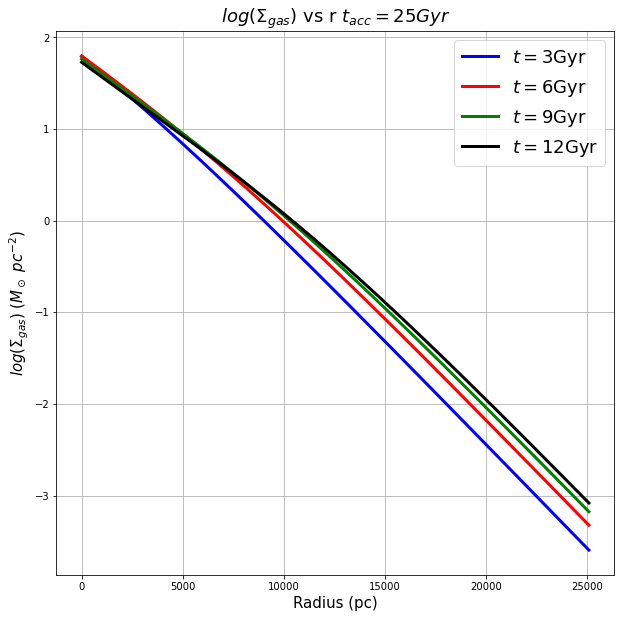

In [202]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_sigma_13), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_sigma_23), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_sigma_33), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_sigma_43), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{gas})$ vs r $t_{acc} = 25Gyr$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/gas surface density vs r (t_acc=25).png')

In [203]:
np.savetxt('data1/M_sigma1_'+f'{np.log10(Mbar)}'+'.txt', M_sigma1)
np.savetxt('data1/M_sigma2_'+f'{np.log10(Mbar)}'+'.txt', M_sigma2)
np.savetxt('data1/M_sigma3_'+f'{np.log10(Mbar)}'+'.txt', M_sigma3)

## $log(\Sigma_{\star})$ vs r

### $t_{acc} = 3Gyr$

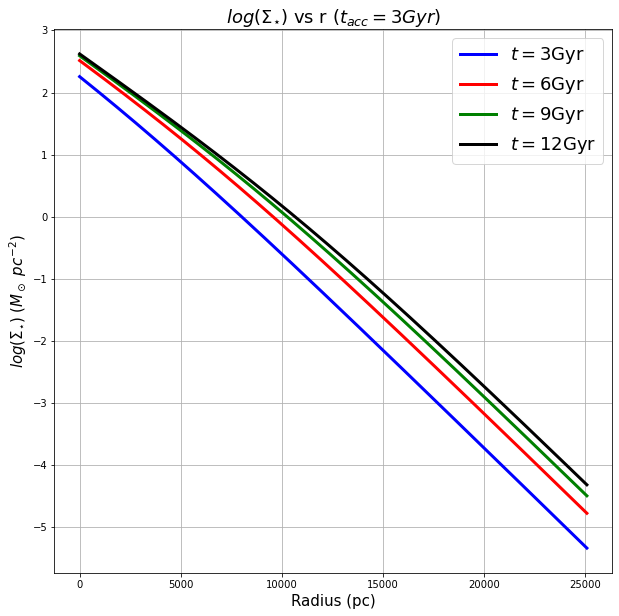

In [204]:
row = M_t[0]
index1 = np.where(np.round(row,1) == 3.0)[0]
index2 = np.where(np.round(row,1) == 6.0)[0]
index3 = np.where(np.round(row,1) == 9.0)[0]
index4 = np.where(np.round(row,1) == 12.0)[0]
M_sfr1 = A*(1-Rf)*M_sigma1**N
dt = 0.1
M_s11 = dt*np.sum(M_sfr1[:,:index1[0]], axis=1)
M_s21 = dt*np.sum(M_sfr1[:,:index2[0]], axis=1)
M_s31 = dt*np.sum(M_sfr1[:,:index3[0]], axis=1)
M_s41 = dt*np.sum(M_sfr1[:,:index4[0]], axis=1)
#print(M_s11)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_s11), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_s21), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_s31), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_s41), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{\star})$ vs r ($t_{acc} = 3Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{\star})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/star surface density vs r (t_acc=3).png')

### $t_{acc} = 10Gyr$

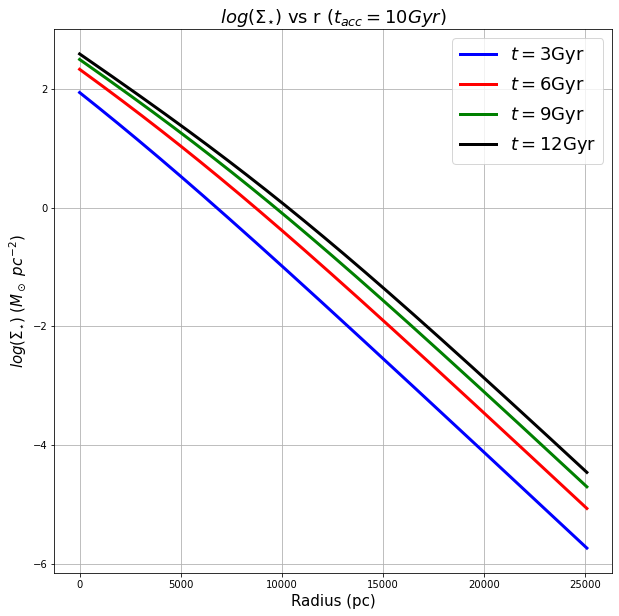

In [205]:
row = M_t[0]
index1 = np.where(np.round(row,1) == 3.0)[0]
index2 = np.where(np.round(row,1) == 6.0)[0]
index3 = np.where(np.round(row,1) == 9.0)[0]
index4 = np.where(np.round(row,1) == 12.0)[0]
M_sfr2 = A*(1-Rf)*M_sigma2**N
dt = 0.1
M_s12 = dt*np.sum(M_sfr2[:,:index1[0]], axis=1)
M_s22 = dt*np.sum(M_sfr2[:,:index2[0]], axis=1)
M_s32 = dt*np.sum(M_sfr2[:,:index3[0]], axis=1)
M_s42 = dt*np.sum(M_sfr2[:,:index4[0]], axis=1)
#print(M_s12)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_s12), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_s22), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_s32), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_s42), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{\star})$ vs r ($t_{acc} = 10Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{\star})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/star surface density vs r (t_acc=10).png')

### $t_{acc} = 25Gyr$

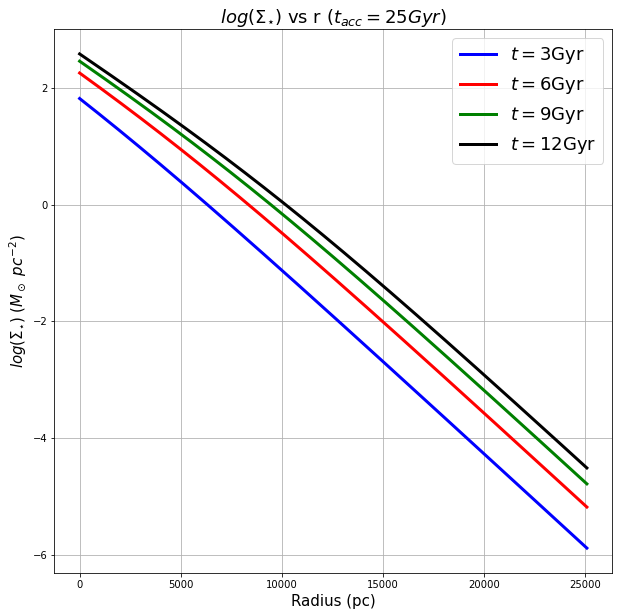

In [206]:
row = M_t[0]
index1 = np.where(np.round(row,1) == 3.0)[0]
index2 = np.where(np.round(row,1) == 6.0)[0]
index3 = np.where(np.round(row,1) == 9.0)[0]
index4 = np.where(np.round(row,1) == 12.0)[0]
M_sfr3 = A*(1-Rf)*M_sigma3**N
dt = 0.1
M_s13 = dt*np.sum(M_sfr3[:,:index1[0]], axis=1)
M_s23 = dt*np.sum(M_sfr3[:,:index2[0]], axis=1)
M_s33 = dt*np.sum(M_sfr3[:,:index3[0]], axis=1)
M_s43 = dt*np.sum(M_sfr3[:,:index4[0]], axis=1)
#print(M_s12)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_s13), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_s23), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_s33), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_s43), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{\star})$ vs r ($t_{acc} = 25Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{\star})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/star surface density vs r (t_acc=25).png')

In [207]:
np.savetxt('data1/M_sfr1_'+f'{np.log10(Mbar)}'+'.txt', M_sfr1)
np.savetxt('data1/M_sfr2_'+f'{np.log10(Mbar)}'+'.txt', M_sfr2)
np.savetxt('data1/M_sfr3_'+f'{np.log10(Mbar)}'+'.txt', M_sfr3)

M_star1 = dt*np.cumsum(M_sfr1, axis=1)
M_star2 = dt*np.cumsum(M_sfr2, axis=1)
M_star3 = dt*np.cumsum(M_sfr3, axis=1)
np.savetxt('data1/M_star1_'+f'{np.log10(Mbar)}'+'.txt', M_star1)
np.savetxt('data1/M_star2_'+f'{np.log10(Mbar)}'+'.txt', M_star2)
np.savetxt('data1/M_star3_'+f'{np.log10(Mbar)}'+'.txt', M_star3)

## $log(\Sigma_{bar})$ vs r

### $t_{acc} = 3Gyr$

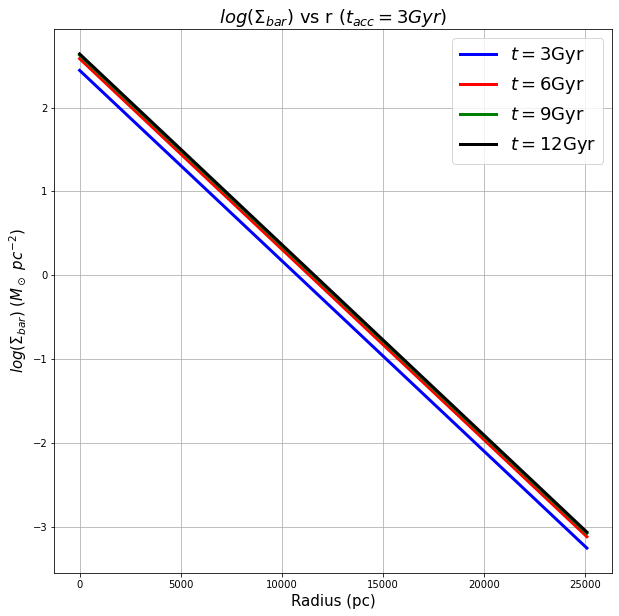

In [208]:
M_bar11 = [np.sum(x) for x in zip(M_s11, M_sigma_11.reshape(1,2510)[0])]
M_bar21 = [np.sum(x) for x in zip(M_s21, M_sigma_21.reshape(1,2510)[0])]
M_bar31 = [np.sum(x) for x in zip(M_s31, M_sigma_31.reshape(1,2510)[0])]
M_bar41 = [np.sum(x) for x in zip(M_s41, M_sigma_41.reshape(1,2510)[0])]

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_bar11), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_bar21), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_bar31), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_bar41), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{bar})$ vs r ($t_{acc} = 3Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{bar})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/baryonic surface density vs r (t_acc = 3).png')

### $t_{acc} = 10Gyr$

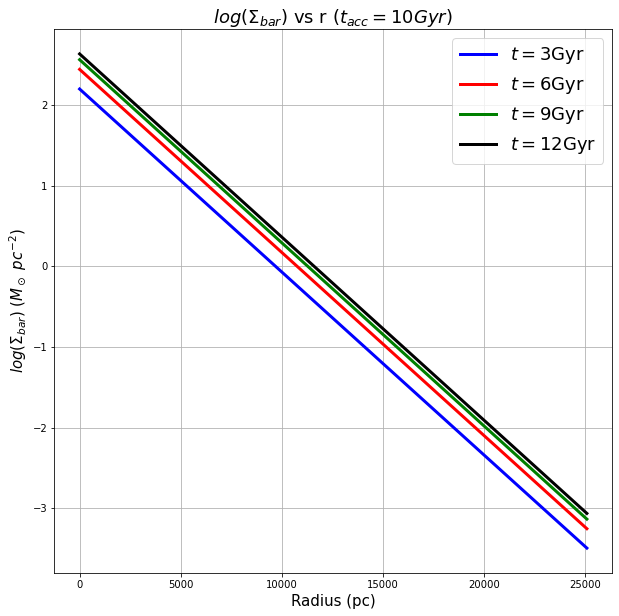

In [209]:
M_bar12 = [np.sum(x) for x in zip(M_s12, M_sigma_12.reshape(1,2510)[0])]
M_bar22 = [np.sum(x) for x in zip(M_s22, M_sigma_22.reshape(1,2510)[0])]
M_bar32 = [np.sum(x) for x in zip(M_s32, M_sigma_32.reshape(1,2510)[0])]
M_bar42 = [np.sum(x) for x in zip(M_s42, M_sigma_42.reshape(1,2510)[0])]

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_bar12), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_bar22), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_bar32), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_bar42), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{bar})$ vs r ($t_{acc} = 10Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{bar})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/baryonic surface density vs r (t_acc = 10).png')

### $t_{acc} = 25Gyr$

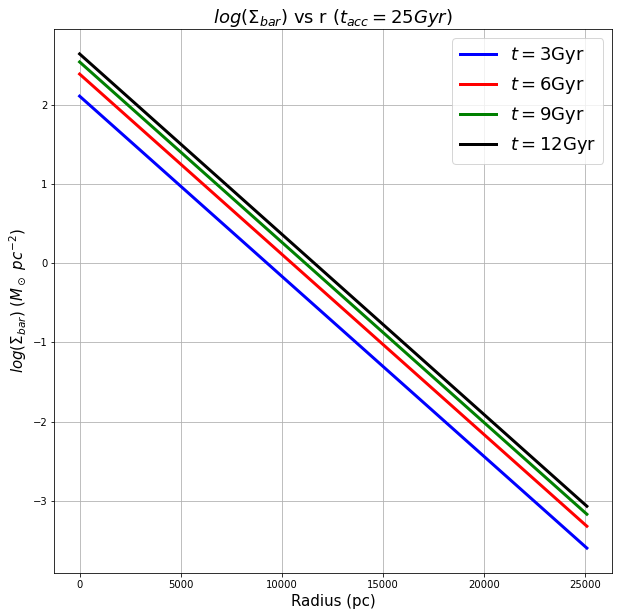

In [210]:
M_bar13 = [np.sum(x) for x in zip(M_s13, M_sigma_13.reshape(1,2510)[0])]
M_bar23 = [np.sum(x) for x in zip(M_s23, M_sigma_23.reshape(1,2510)[0])]
M_bar33 = [np.sum(x) for x in zip(M_s33, M_sigma_33.reshape(1,2510)[0])]
M_bar43 = [np.sum(x) for x in zip(M_s43, M_sigma_43.reshape(1,2510)[0])]

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, np.log10(M_bar13), label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, np.log10(M_bar23), label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, np.log10(M_bar33), label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, np.log10(M_bar43), label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$log(\Sigma_{bar})$ vs r ($t_{acc} = 25Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{bar})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/baryonic surface density vs r (t_acc = 25).png')

In [211]:
M_bar1 = np.array([np.sum(x) for x in zip(M_sigma1.ravel(), M_star1.ravel())]).reshape(M_sigma1.shape)
M_bar2 = np.array([np.sum(x) for x in zip(M_sigma2.ravel(), M_star2.ravel())]).reshape(M_sigma2.shape)
M_bar3 = np.array([np.sum(x) for x in zip(M_sigma3.ravel(), M_star3.ravel())]).reshape(M_sigma3.shape)

np.savetxt('data1/M_bar1_'+f'{np.log10(Mbar)}'+'.txt', M_bar1)
np.savetxt('data1/M_bar2_'+f'{np.log10(Mbar)}'+'.txt', M_bar2)
np.savetxt('data1/M_bar3_'+f'{np.log10(Mbar)}'+'.txt', M_bar3)

## $M_{gas}$ vs r

### $t_{acc} = 3Gyr$

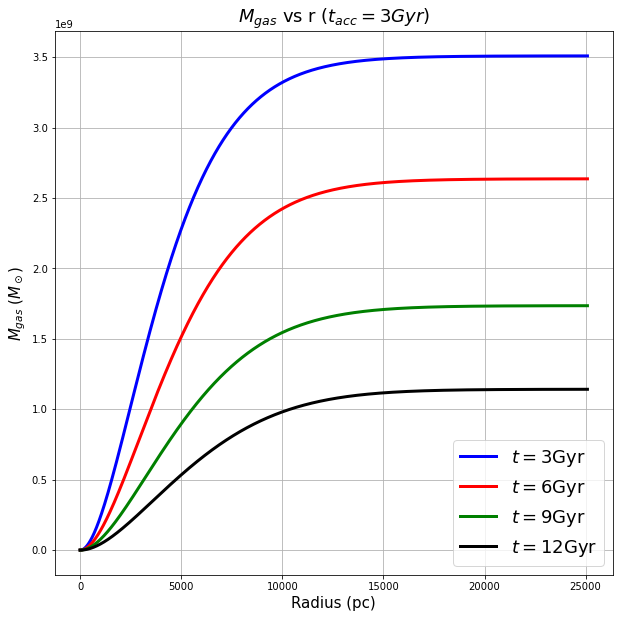

In [212]:
dr = 10

Ma_gas_11 = []
Ma_gas_21 = []
Ma_gas_31 = []
Ma_gas_41 = []
Ma_gas_12 = []
Ma_gas_22 = []
Ma_gas_32 = []
Ma_gas_42 = []
Ma_gas_13 = []
Ma_gas_23 = []
Ma_gas_33 = []
Ma_gas_43 = []

for i, r_value in enumerate(r):
    Ma_gas_11.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_11.reshape(1,2510)[0][:i]))
    Ma_gas_21.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_21.reshape(1,2510)[0][:i]))
    Ma_gas_31.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_31.reshape(1,2510)[0][:i]))
    Ma_gas_41.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_41.reshape(1,2510)[0][:i]))
    Ma_gas_12.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_12.reshape(1,2510)[0][:i]))
    Ma_gas_22.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_22.reshape(1,2510)[0][:i]))
    Ma_gas_32.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_32.reshape(1,2510)[0][:i]))
    Ma_gas_42.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_42.reshape(1,2510)[0][:i]))
    Ma_gas_13.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_13.reshape(1,2510)[0][:i]))
    Ma_gas_23.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_23.reshape(1,2510)[0][:i]))
    Ma_gas_33.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_33.reshape(1,2510)[0][:i]))
    Ma_gas_43.append(2*np.pi*dr*np.sum(r[:i]*M_sigma_43.reshape(1,2510)[0][:i]))
    

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_gas_11, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_gas_21, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_gas_31, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_gas_41, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{gas}$ vs r ($t_{acc} = 3Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{gas}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/mass of gas vs r (t_acc = 3).png')

### $t_{acc} = 10Gyr$

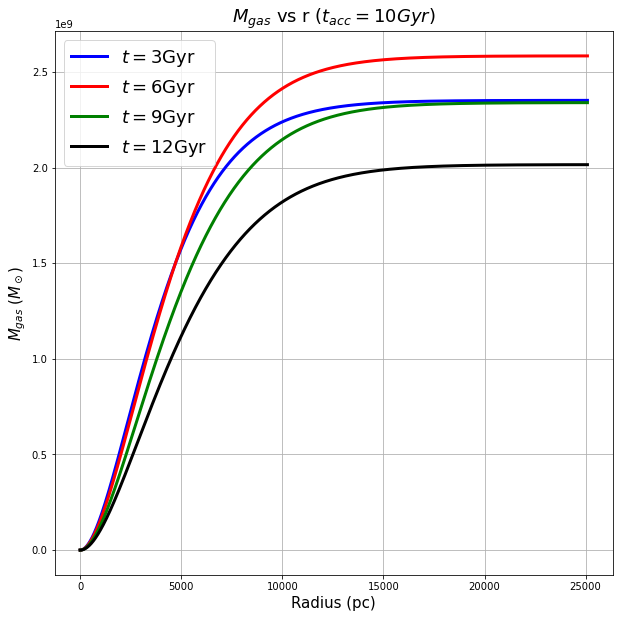

In [213]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_gas_12, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_gas_22, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_gas_32, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_gas_42, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{gas}$ vs r ($t_{acc} = 10Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{gas}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/mass of gas vs r (t_acc = 10).png')

### $t_{acc} = 25Gyr$

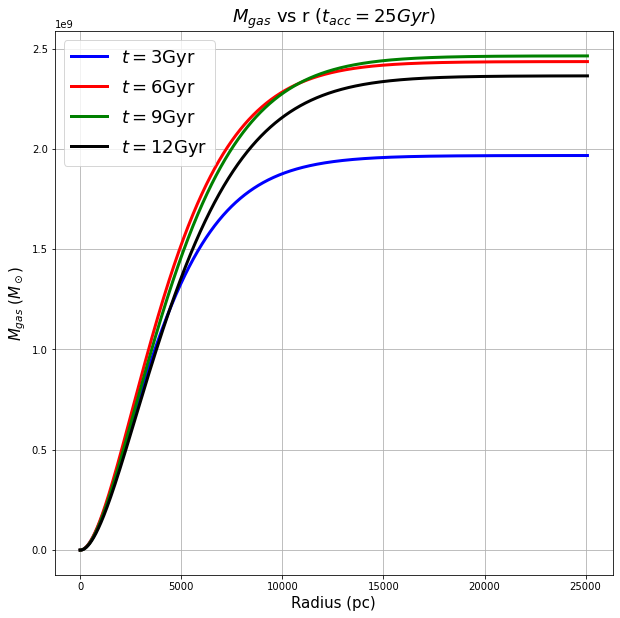

In [214]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_gas_13, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_gas_23, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_gas_33, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_gas_43, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{gas}$ vs r ($t_{acc} = 25Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{gas}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/mass of gas vs r (t_acc = 25).png')

## $M_{\star}$ vs r

### $t_{acc} = 3Gyr$

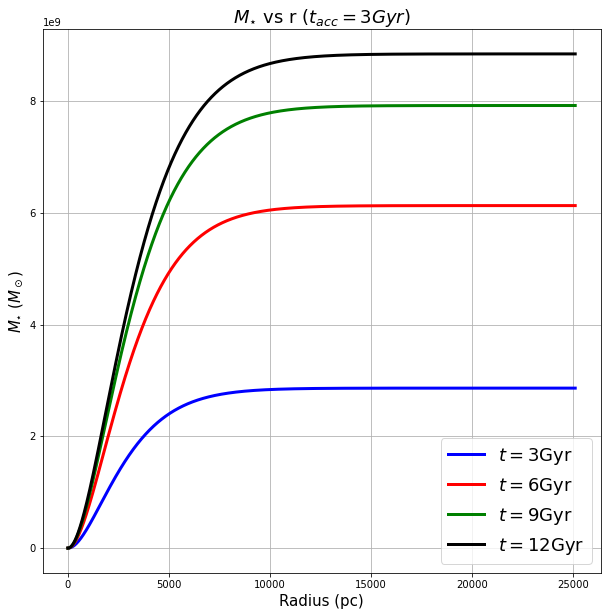

In [215]:
dr = 10

Ma_star_11 = []
Ma_star_21 = []
Ma_star_31 = []
Ma_star_41 = []
Ma_star_12 = []
Ma_star_22 = []
Ma_star_32 = []
Ma_star_42 = []
Ma_star_13 = []
Ma_star_23 = []
Ma_star_33 = []
Ma_star_43 = []

for i, r_value in enumerate(r):
    Ma_star_11.append(2*np.pi*dr*np.sum(r[:i]*M_s11.reshape(1,2510)[0][:i]))
    Ma_star_21.append(2*np.pi*dr*np.sum(r[:i]*M_s21.reshape(1,2510)[0][:i]))
    Ma_star_31.append(2*np.pi*dr*np.sum(r[:i]*M_s31.reshape(1,2510)[0][:i]))
    Ma_star_41.append(2*np.pi*dr*np.sum(r[:i]*M_s41.reshape(1,2510)[0][:i]))
    Ma_star_12.append(2*np.pi*dr*np.sum(r[:i]*M_s12.reshape(1,2510)[0][:i]))
    Ma_star_22.append(2*np.pi*dr*np.sum(r[:i]*M_s22.reshape(1,2510)[0][:i]))
    Ma_star_32.append(2*np.pi*dr*np.sum(r[:i]*M_s32.reshape(1,2510)[0][:i]))
    Ma_star_42.append(2*np.pi*dr*np.sum(r[:i]*M_s42.reshape(1,2510)[0][:i]))
    Ma_star_13.append(2*np.pi*dr*np.sum(r[:i]*M_s13.reshape(1,2510)[0][:i]))
    Ma_star_23.append(2*np.pi*dr*np.sum(r[:i]*M_s23.reshape(1,2510)[0][:i]))
    Ma_star_33.append(2*np.pi*dr*np.sum(r[:i]*M_s33.reshape(1,2510)[0][:i]))
    Ma_star_43.append(2*np.pi*dr*np.sum(r[:i]*M_s43.reshape(1,2510)[0][:i]))
    

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_star_11, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_star_21, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_star_31, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_star_41, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{\star}$ vs r ($t_{acc} = 3Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{\star}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/stellar mass vs r (t_acc = 3).png')

### $t_{acc} = 10Gyr$

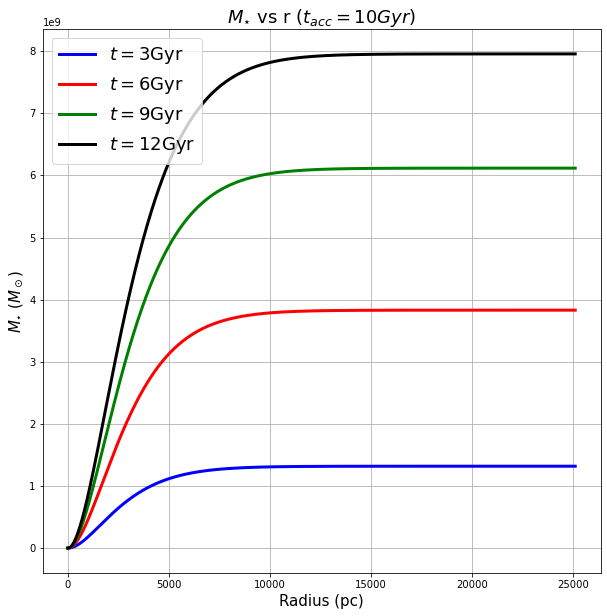

In [216]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_star_12, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_star_22, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_star_32, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_star_42, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{\star}$ vs r ($t_{acc} = 10Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{\star}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/stellar mass vs r (t_acc = 10).png')

### $t_{acc} = 25Gyr$

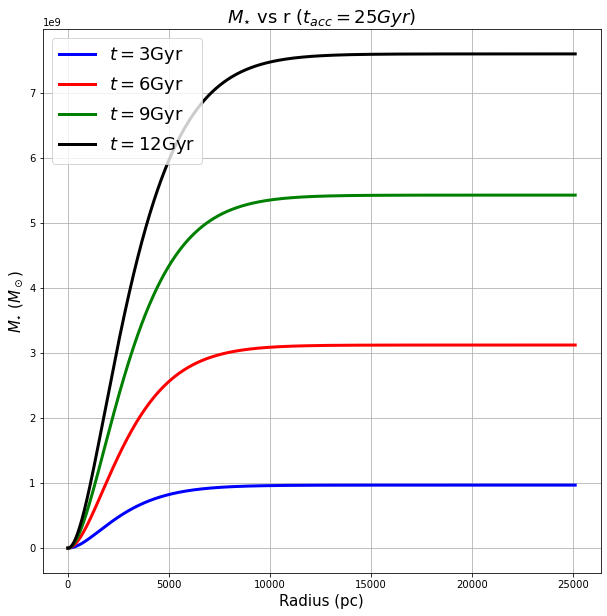

In [217]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_star_13, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_star_23, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_star_33, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_star_43, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{\star}$ vs r ($t_{acc} = 25Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{\star}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/stellar mass vs r (t_acc = 25).png')

## $M_{bar}$ vs r

### $t_{acc} = 3Gyr$

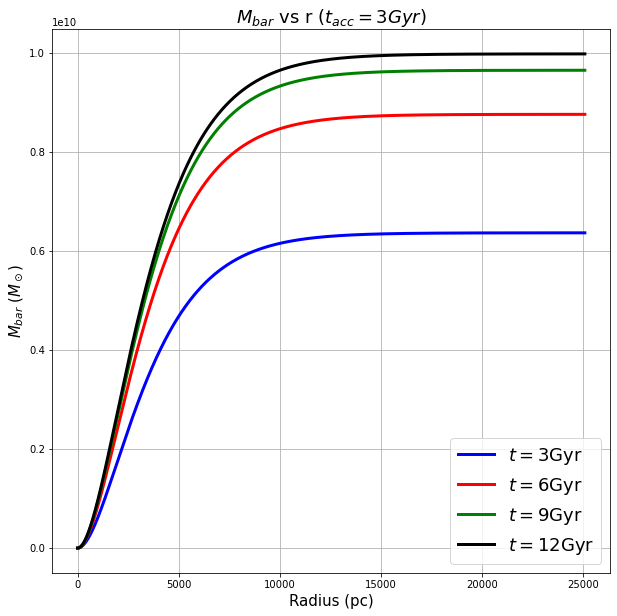

In [218]:
dr = 10

Ma_bar_11 = []
Ma_bar_21 = []
Ma_bar_31 = []
Ma_bar_41 = []
Ma_bar_12 = []
Ma_bar_22 = []
Ma_bar_32 = []
Ma_bar_42 = []
Ma_bar_13 = []
Ma_bar_23 = []
Ma_bar_33 = []
Ma_bar_43 = []

for i, r_value in enumerate(r):
    Ma_bar_11.append(2*np.pi*dr*np.sum(r[:i]*M_bar11[:i]))
    Ma_bar_21.append(2*np.pi*dr*np.sum(r[:i]*M_bar21[:i]))
    Ma_bar_31.append(2*np.pi*dr*np.sum(r[:i]*M_bar31[:i]))
    Ma_bar_41.append(2*np.pi*dr*np.sum(r[:i]*M_bar41[:i]))
    Ma_bar_12.append(2*np.pi*dr*np.sum(r[:i]*M_bar12[:i]))
    Ma_bar_22.append(2*np.pi*dr*np.sum(r[:i]*M_bar22[:i]))
    Ma_bar_32.append(2*np.pi*dr*np.sum(r[:i]*M_bar32[:i]))
    Ma_bar_42.append(2*np.pi*dr*np.sum(r[:i]*M_bar42[:i]))
    Ma_bar_13.append(2*np.pi*dr*np.sum(r[:i]*M_bar13[:i]))
    Ma_bar_23.append(2*np.pi*dr*np.sum(r[:i]*M_bar23[:i]))
    Ma_bar_33.append(2*np.pi*dr*np.sum(r[:i]*M_bar33[:i]))
    Ma_bar_43.append(2*np.pi*dr*np.sum(r[:i]*M_bar43[:i]))
    

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_bar_11, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_bar_21, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_bar_31, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_bar_41, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{bar}$ vs r ($t_{acc} = 3Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{bar}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/baryonic mass vs r (t_acc = 3).png')

### $t_{acc} = 10Gyr$

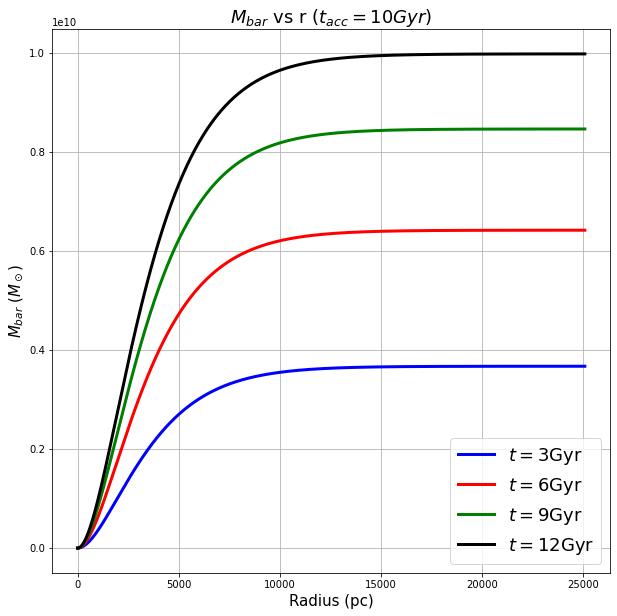

In [219]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_bar_12, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_bar_22, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_bar_32, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_bar_42, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{bar}$ vs r ($t_{acc} = 10Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{bar}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/baryonic mass vs r (t_acc = 10).png')

### $t_{acc} = 25Gyr$

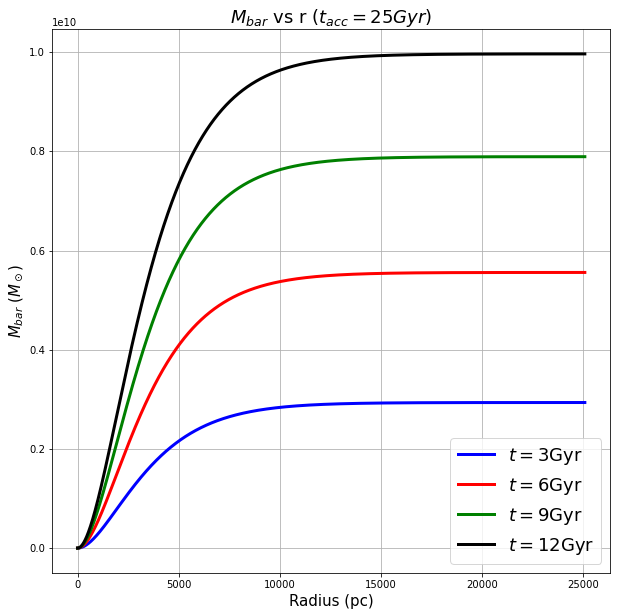

In [220]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, Ma_bar_13, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, Ma_bar_23, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, Ma_bar_33, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, Ma_bar_43, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$M_{bar}$ vs r ($t_{acc} = 25Gyr$)", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$M_{bar}$ $(M_\odot)$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/baryonic mass vs r (t_acc = 25).png')

## $f_{gas}$ vs r

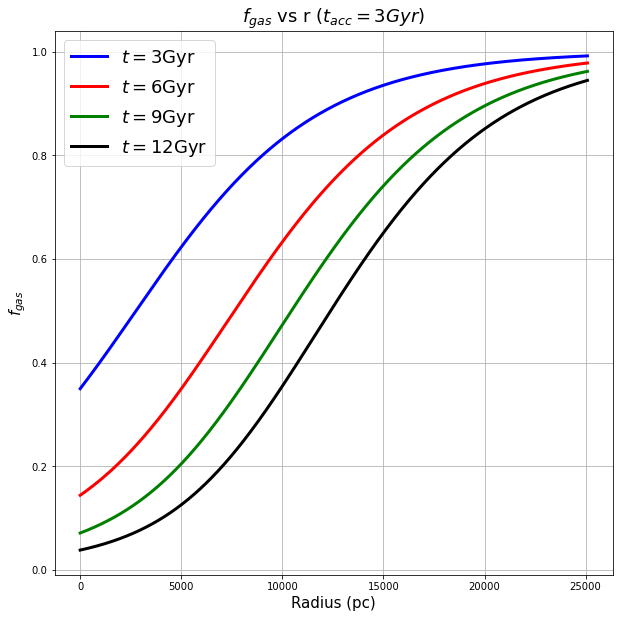

In [221]:
f_gas_11 = np.divide(M_sigma_11.reshape(1,2510)[0], M_bar11)
f_gas_21 = np.divide(M_sigma_21.reshape(1,2510)[0], M_bar21)
f_gas_31 = np.divide(M_sigma_31.reshape(1,2510)[0], M_bar31)
f_gas_41 = np.divide(M_sigma_41.reshape(1,2510)[0], M_bar41)
f_gas_12 = np.divide(M_sigma_12.reshape(1,2510)[0], M_bar12)
f_gas_22 = np.divide(M_sigma_22.reshape(1,2510)[0], M_bar22)
f_gas_32 = np.divide(M_sigma_32.reshape(1,2510)[0], M_bar32)
f_gas_42 = np.divide(M_sigma_42.reshape(1,2510)[0], M_bar42)
f_gas_13 = np.divide(M_sigma_13.reshape(1,2510)[0], M_bar13)
f_gas_23 = np.divide(M_sigma_23.reshape(1,2510)[0], M_bar23)
f_gas_33 = np.divide(M_sigma_33.reshape(1,2510)[0], M_bar33)
f_gas_43 = np.divide(M_sigma_43.reshape(1,2510)[0], M_bar43)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, f_gas_11, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, f_gas_21, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, f_gas_31, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, f_gas_41, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$f_{gas}$ vs r $(t_{acc} = 3Gyr)$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/f_gas surface density vs radius (t_acc = 3).png')

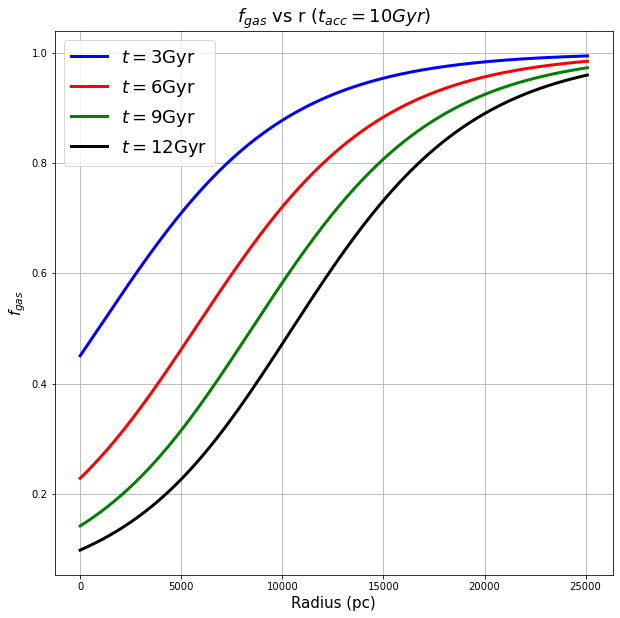

In [222]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, f_gas_12, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, f_gas_22, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, f_gas_32, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, f_gas_42, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$f_{gas}$ vs r $(t_{acc} = 10Gyr)$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/f_gas surface density vs radius (t_acc = 10).png')

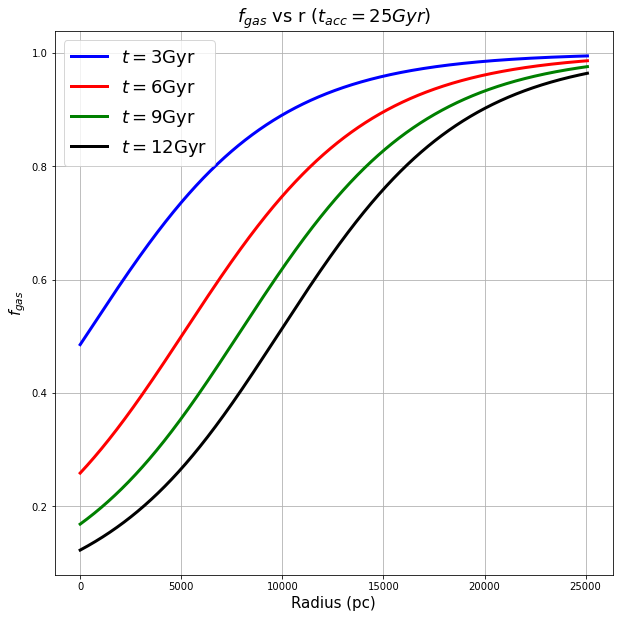

In [223]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, f_gas_13, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, f_gas_23, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, f_gas_33, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, f_gas_43, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"$f_{gas}$ vs r $(t_{acc} = 25Gyr)$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/f_gas surface density vs radius (t_acc = 25).png')

In [224]:
f_gas1 = np.divide(M_sigma1, M_bar1)
f_gas2 = np.divide(M_sigma2, M_bar2)
f_gas3 = np.divide(M_sigma3, M_bar3)

np.savetxt('data1/f_gas1_'+f'{np.log10(Mbar)}'+'.txt', f_gas1)
np.savetxt('data1/f_gas2_'+f'{np.log10(Mbar)}'+'.txt', f_gas2)
np.savetxt('data1/f_gas3_'+f'{np.log10(Mbar)}'+'.txt', f_gas3)

/var/lib/condor/execute/dir_2565397/ipykernel_2565531/3886611985.py:1: RuntimeWarning: invalid value encountered in true_divide
  f_gas1 = np.divide(M_sigma1, M_bar1)
/var/lib/condor/execute/dir_2565397/ipykernel_2565531/3886611985.py:2: RuntimeWarning: invalid value encountered in true_divide
  f_gas2 = np.divide(M_sigma2, M_bar2)
/var/lib/condor/execute/dir_2565397/ipykernel_2565531/3886611985.py:3: RuntimeWarning: invalid value encountered in true_divide
  f_gas3 = np.divide(M_sigma3, M_bar3)


## Star Formation Efficiency (SFE)

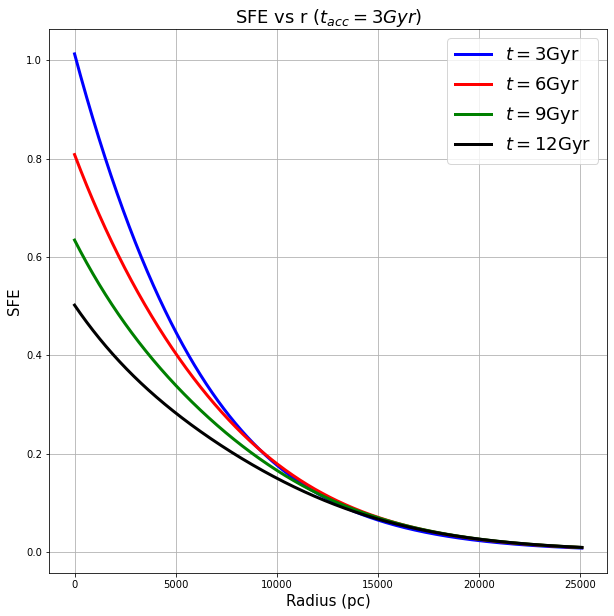

In [225]:
SFE_11 = A*M_sigma_11**(N-1)
SFE_21 = A*M_sigma_21**(N-1)
SFE_31 = A*M_sigma_31**(N-1)
SFE_41 = A*M_sigma_41**(N-1)
SFE_12 = A*M_sigma_12**(N-1)
SFE_22 = A*M_sigma_22**(N-1)
SFE_32 = A*M_sigma_32**(N-1)
SFE_42 = A*M_sigma_42**(N-1)
SFE_13 = A*M_sigma_13**(N-1)
SFE_23 = A*M_sigma_23**(N-1)
SFE_33 = A*M_sigma_33**(N-1)
SFE_43 = A*M_sigma_43**(N-1)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, SFE_11, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, SFE_21, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, SFE_31, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, SFE_41, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"SFE vs r $(t_{acc} = 3Gyr)$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"SFE", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/SFE vs radius (t_acc = 3).png')

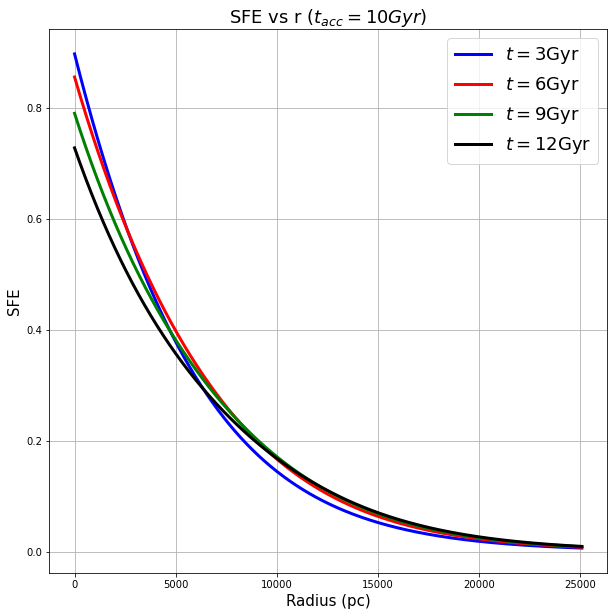

In [226]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, SFE_12, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, SFE_22, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, SFE_32, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, SFE_42, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"SFE vs r $(t_{acc} = 10Gyr)$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"SFE", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/SFE vs radius (t_acc = 3).png')

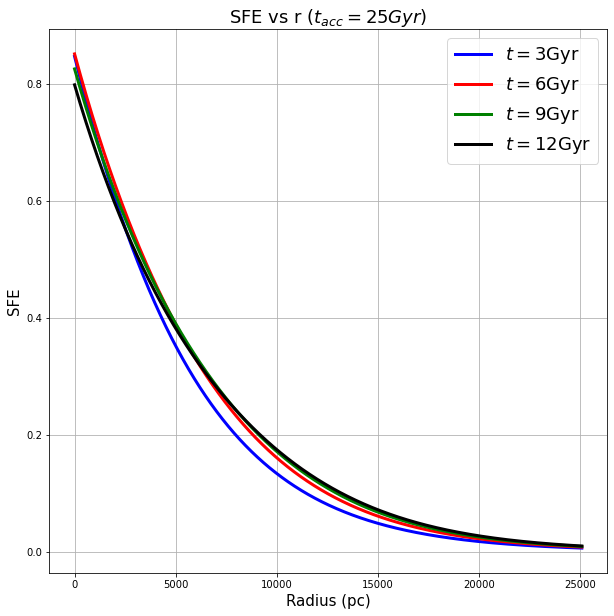

In [227]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, SFE_13, label=r"$t = 3$Gyr", color="blue", lw=3)
frame.plot(r, SFE_23, label=r"$t = 6$Gyr", color="red", lw=3)
frame.plot(r, SFE_33, label=r"$t = 9$Gyr", color="green", lw=3)
frame.plot(r, SFE_43, label=r"$t = 12$Gyr", color="black", lw=3)
frame.set_title(r"SFE vs r $(t_{acc} = 25Gyr)$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"SFE", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/SFE vs radius (t_acc = 3).png')

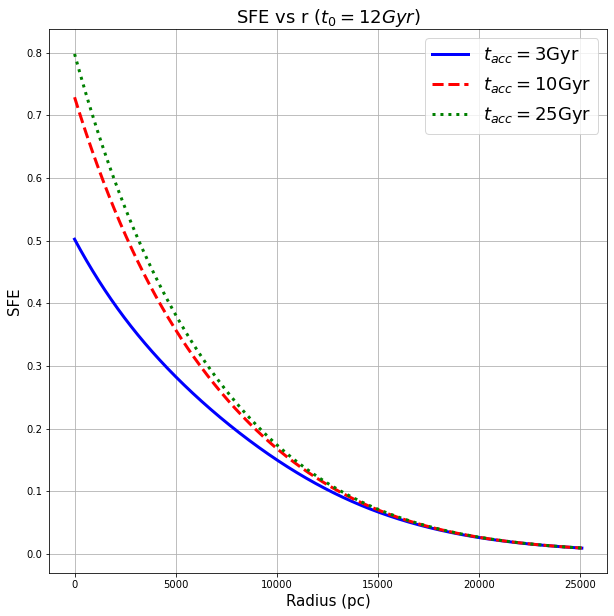

In [228]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(r, SFE_41, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(r, SFE_42, label=r"$t_{acc} = 10$Gyr", color="red", linestyle="dashed", lw=3)
frame.plot(r, SFE_43, label=r"$t_{acc} = 25$Gyr", color="green", linestyle="dotted", lw=3)
frame.set_title(r"SFE vs r $(t_0 = 12Gyr)$", fontsize = 18)
frame.set_xlabel("Radius (pc)", fontsize = 15)
frame.set_ylabel(r"SFE", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/SFE vs radius (t_0 = 12).png')

## $M_{gas}$ vs t

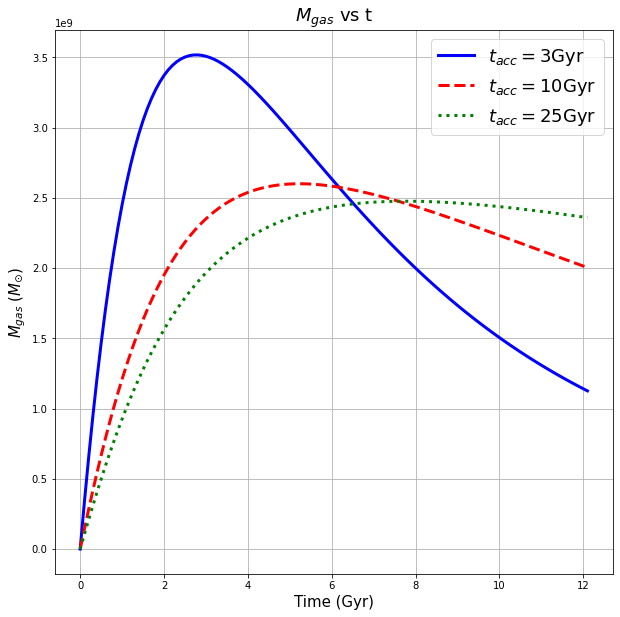

In [229]:
#print(M_sigma1)
dr = 10
M_time = M_t[-1,:]
Mass_gas_summed1 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sigma1, axis=0)
Mass_gas_summed2 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sigma2, axis=0)
Mass_gas_summed3 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sigma3, axis=0)
#print(Mass_gas_summed1)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, Mass_gas_summed1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(M_time, Mass_gas_summed2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, Mass_gas_summed3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$M_{gas}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$M_{gas}$ $(M_{\odot})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/M_gas vs time.png')

## $M_{\star}$ vs t

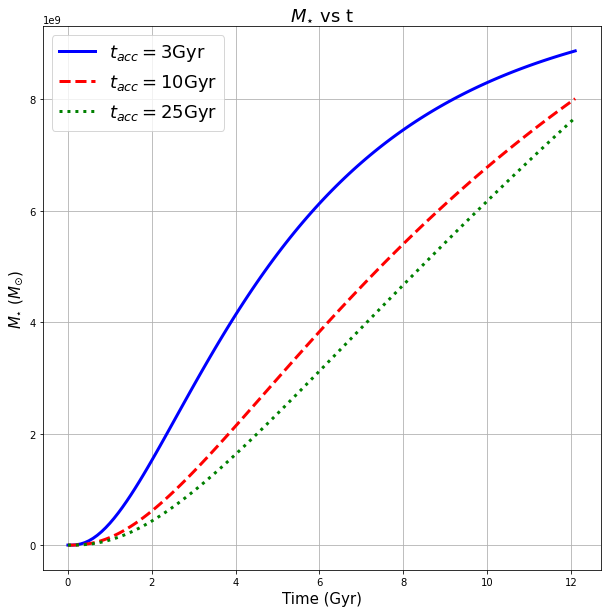

In [230]:
dr = 10
M_time = M_t[-1,:]
Mass_time_star_1 = []
Mass_time_star_2 = []
Mass_time_star_3 = []
Mass_sfr_summed1 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sfr1, axis=0)
Mass_sfr_summed2 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sfr2, axis=0)
Mass_sfr_summed3 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sfr3, axis=0)

#print(Mass_gas_summed1)
#print(len(M_time))
dt = 0.1

for i in range(len(M_time)):
    Mass_time_star_1.append(dt*np.sum(Mass_sfr_summed1[:i]))
    Mass_time_star_2.append(dt*np.sum(Mass_sfr_summed2[:i]))
    Mass_time_star_3.append(dt*np.sum(Mass_sfr_summed3[:i]))
    
#print(Mass_time_gas_1)
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, Mass_time_star_1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(M_time, Mass_time_star_2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, Mass_time_star_3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$M_{\star}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$M_{\star}$ $(M_{\odot})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/M_star vs time.png')

## $M_{bar}$ vs t

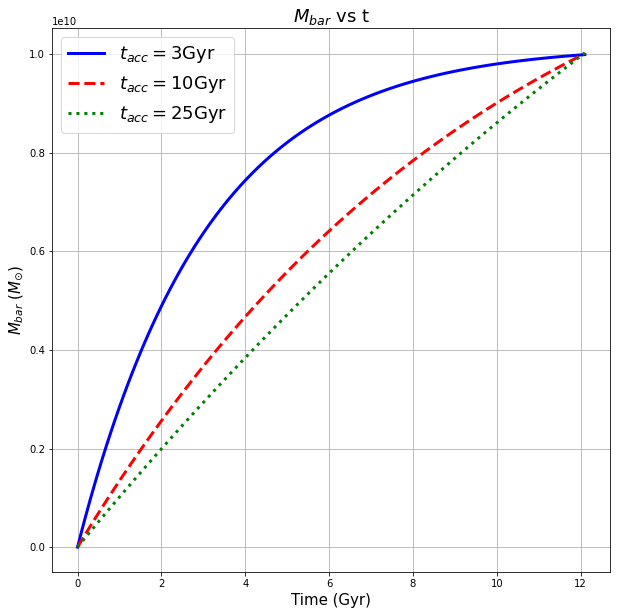

In [231]:
Mass_time_bar_1 = [np.sum(x) for x in zip(Mass_time_star_1, Mass_gas_summed1)]
Mass_time_bar_2 = [np.sum(x) for x in zip(Mass_time_star_2, Mass_gas_summed2)]
Mass_time_bar_3 = [np.sum(x) for x in zip(Mass_time_star_3, Mass_gas_summed3)]

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, Mass_time_bar_1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(M_time, Mass_time_bar_2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, Mass_time_bar_3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$M_{bar}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$M_{bar}$ $(M_{\odot})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/M_bar vs time.png')

#  Global $f_{gas}$ vs t (with varying $t_{acc}$)

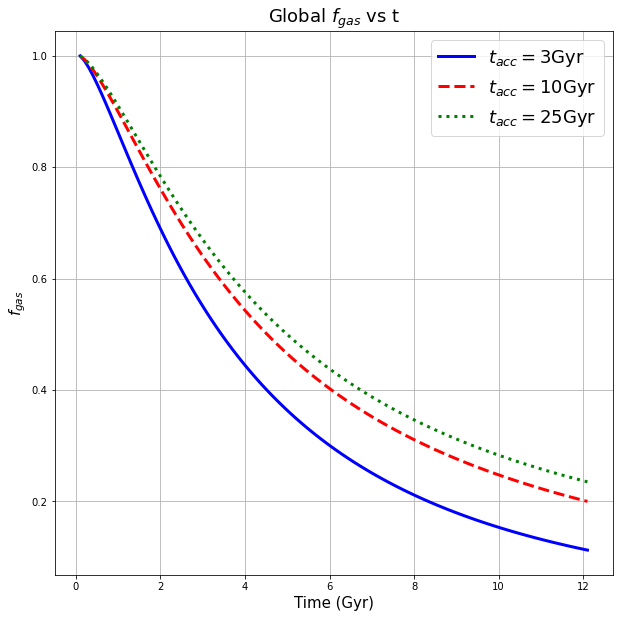

In [232]:
warnings.filterwarnings('ignore')

f_global_gas1 = np.divide(Mass_gas_summed1, Mass_time_bar_1)
f_global_gas2 = np.divide(Mass_gas_summed2, Mass_time_bar_2)
f_global_gas3 = np.divide(Mass_gas_summed3, Mass_time_bar_3)

np.savetxt('data1/f_gas1_vs_t_'+f'{np.log10(Mbar)}'+'.txt', f_global_gas1)
np.savetxt('data1/f_gas2_vs_t_'+f'{np.log10(Mbar)}'+'.txt', f_global_gas2)
np.savetxt('data1/f_gas3_vs_t_'+f'{np.log10(Mbar)}'+'.txt', f_global_gas3)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, f_global_gas1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(M_time, f_global_gas2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, f_global_gas3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"Global $f_{gas}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/Global f_gas vs time.png')

In [233]:
warnings.filterwarnings('default')

## $v_{rot}$ vs t

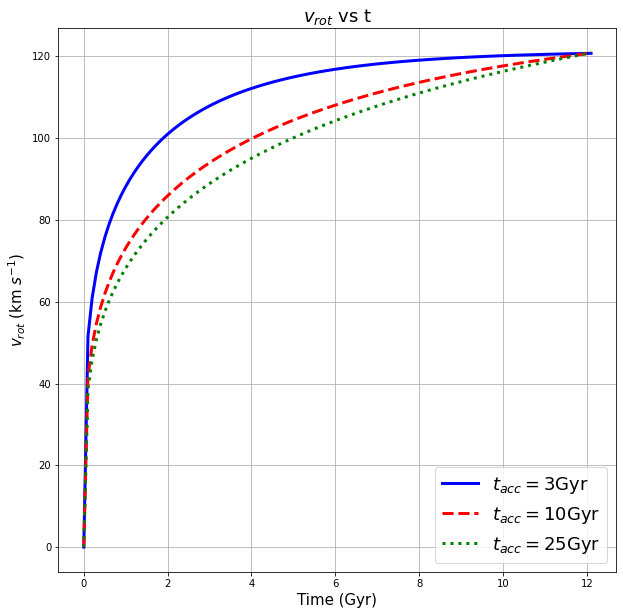

In [234]:
Ag = 47 #M_{\odot} km^{-4} s^{-4} 
v_rot1 = (np.array(Mass_time_bar_1)/Ag)**0.25
v_rot2 = (np.array(Mass_time_bar_2)/Ag)**0.25
v_rot3 = (np.array(Mass_time_bar_3)/Ag)**0.25

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, v_rot1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(M_time, v_rot2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, v_rot3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$v_{rot}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$v_{rot}$ (km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/v_rot vs time.png')

# Specific Angular Momentum $j_{bar}$  (with varying $t_{acc}$)

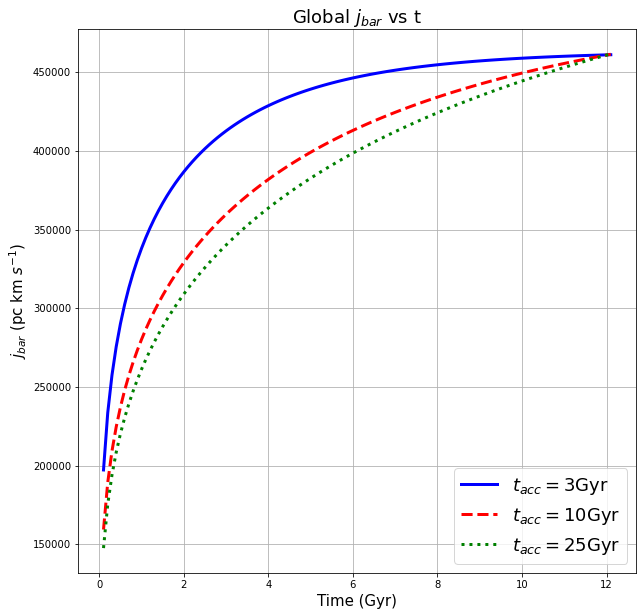

In [235]:
warnings.filterwarnings('ignore')
dr = 10
M_time = M_t[-1,:]
Nominator_gas1 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sigma1, axis=0)
Nominator_gas2 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sigma2, axis=0)
Nominator_gas3 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sigma3, axis=0)

Nominator_star1 = []
Nominator_star2 = []
Nominator_star3 = []
sfr_r_squared1 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sfr1, axis=0)
sfr_r_squared2 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sfr2, axis=0)
sfr_r_squared3 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sfr3, axis=0)
dt = 0.1

for i in range(len(M_time)):
    Nominator_star1.append(dt*np.sum(sfr_r_squared1[:i]))
    Nominator_star2.append(dt*np.sum(sfr_r_squared2[:i]))
    Nominator_star3.append(dt*np.sum(sfr_r_squared3[:i]))

Nominator_bar1 = [np.sum(x) for x in zip(Nominator_star1, Nominator_gas1)]
Nominator_bar2 = [np.sum(x) for x in zip(Nominator_star2, Nominator_gas2)]
Nominator_bar3 = [np.sum(x) for x in zip(Nominator_star3, Nominator_gas3)]

Nominator1 = v_rot1*Nominator_bar1
Nominator2 = v_rot2*Nominator_bar2
Nominator3 = v_rot3*Nominator_bar3

j_bar1 = np.divide(Nominator1,Mass_time_bar_1)
j_bar2 = np.divide(Nominator2,Mass_time_bar_2)
j_bar3 = np.divide(Nominator3,Mass_time_bar_3)
#print(j_bar1)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, j_bar1, label=r"$t_{acc} = 3$Gyr", color="blue", lw=3)
frame.plot(M_time, j_bar2, label=r"$t_{acc} = 10$Gyr", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, j_bar3, label=r"$t_{acc} = 25$Gyr", linestyle="dotted", color="green", lw=3)
frame.set_title(r"Global $j_{bar}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$j_{bar}$ (pc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/Global j_bar vs time.png')

In [236]:
warnings.filterwarnings('default')

# Changing $r_{acc}$, and keeping $t_{acc}$ constant

In [48]:
Mbar = 10**10
N = 1.4 #below
A = 0.1625 # with N above used in K-S law
Rf = 0.3 #return factor
t_acc = 10
C = Mbar/(t_acc*(1-np.exp(-12/t_acc)))

r = np.arange(0,1000*25.1,10)

M_t = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))
M_sigma_r1 = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))
M_sigma_r2 = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))
M_sigma_r3 = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))
r_acc = 1.9*1000

for i,r_value in enumerate(r):
    def dydx(t,S):
        return (C/(2*np.pi*(r_acc**2)))*np.exp(-t/t_acc)*np.exp(-r_value/r_acc)-A*(1-Rf)*(S**N)
    #print(r_value)
    x0 = 0
    y0 = 0
    dx = 0.1
    x_end = 12
    
    S_1 = np.zeros(len(x_rk2))
    t_1 = np.zeros(len(x_rk2))

    y = y0
    x = x0
    j=1
    while x <= x_end:

        x, y = RungeKutta(x, y, dx, dydx)
        #print(x,y)
        t_1[j] = np.round(x,1)
        S_1[j] = y
        j+=1
    
    M_t[i,:] = t_1
    M_sigma_r1[i,:] = S_1
    
r_acc = 0.95*1000

for i,r_value in enumerate(r):
    def dydx(t,S):
        return (C/(2*np.pi*(r_acc**2)))*np.exp(-t/t_acc)*np.exp(-r_value/r_acc)-A*(1-Rf)*(S**N)
    #print(r_value)
    x0 = 0
    y0 = 0
    dx = 0.1
    x_end = 12
    
    S_1 = np.zeros(len(x_rk2))
    t_1 = np.zeros(len(x_rk2))

    y = y0
    x = x0
    j=1
    while x <= x_end:

        x, y = RungeKutta(x, y, dx, dydx)
        #print(x,y)
        t_1[j] = np.round(x,1)
        S_1[j] = y
        j+=1
    
    M_t[i,:] = t_1
    M_sigma_r2[i,:] = S_1

r_acc = 3.8*1000

for i,r_value in enumerate(r):
    def dydx(t,S):
        return (C/(2*np.pi*(r_acc**2)))*np.exp(-t/t_acc)*np.exp(-r_value/r_acc)-A*(1-Rf)*(S**N)
    #print(r_value)
    x0 = 0
    y0 = 0
    dx = 0.1
    x_end = 12
    
    S_1 = np.zeros(len(x_rk2))
    t_1 = np.zeros(len(x_rk2))

    y = y0
    x = x0
    j=1
    while x <= x_end:

        x, y = RungeKutta(x, y, dx, dydx)
        #print(x,y)
        t_1[j] = np.round(x,1)
        S_1[j] = y
        j+=1
    
    M_t[i,:] = t_1
    M_sigma_r3[i,:] = S_1

M_sfr_r1 = A*(1-Rf)*M_sigma_r1**N
M_sfr_r2 = A*(1-Rf)*M_sigma_r2**N
M_sfr_r3 = A*(1-Rf)*M_sigma_r3**N

## $M_{gas}$ vs t

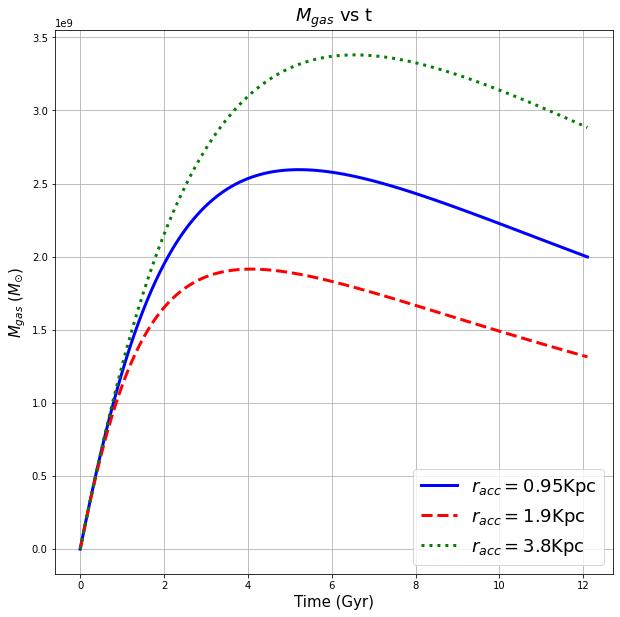

In [49]:
#print(M_sigma1)
dr = 10
M_time = M_t[-1,:]
Mass_gas_summed_r1 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sigma_r1, axis=0)
Mass_gas_summed_r2 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sigma_r2, axis=0)
Mass_gas_summed_r3 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sigma_r3, axis=0)
#print(Mass_gas_summed1)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, Mass_gas_summed_r1, label=r"$r_{acc} = 0.95$Kpc", color="blue", lw=3)
frame.plot(M_time, Mass_gas_summed_r2, label=r"$r_{acc} = 1.9$Kpc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, Mass_gas_summed_r3, label=r"$r_{acc} = 3.8$Kpc", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$M_{gas}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$M_{gas}$ $(M_{\odot})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/M_gas vs time (r_acc variation).png')

## $M_{\star}$ vs t

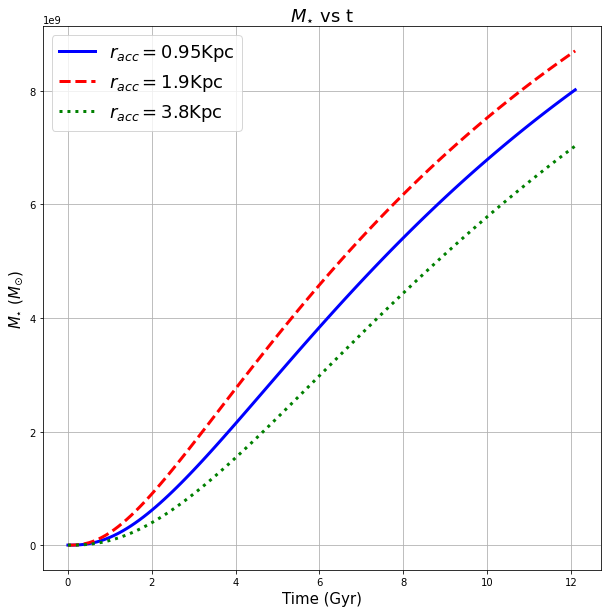

In [50]:
dr = 10
M_time = M_t[-1,:]
Mass_time_star_r1 = []
Mass_time_star_r2 = []
Mass_time_star_r3 = []
Mass_sfr_summed_r1 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sfr_r1, axis=0)
Mass_sfr_summed_r2 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sfr_r2, axis=0)
Mass_sfr_summed_r3 = 2*np.pi*dr*np.sum(r.reshape(2510,1)*M_sfr_r3, axis=0)

#print(Mass_gas_summed1)
#print(len(M_time))
dt = 0.1

for i in range(len(M_time)):
    Mass_time_star_r1.append(dt*np.sum(Mass_sfr_summed_r1[:i]))
    Mass_time_star_r2.append(dt*np.sum(Mass_sfr_summed_r2[:i]))
    Mass_time_star_r3.append(dt*np.sum(Mass_sfr_summed_r3[:i]))
    
#print(Mass_time_gas_1)
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, Mass_time_star_r1, label=r"$r_{acc} = 0.95$Kpc", color="blue", lw=3)
frame.plot(M_time, Mass_time_star_r2, label=r"$r_{acc} = 1.9$Kpc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, Mass_time_star_r3, label=r"$r_{acc} = 3.8$Kpc", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$M_{\star}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$M_{\star}$ $(M_{\odot})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/M_star vs time (r_acc variation).png')

## $M_{bar}$ vs t

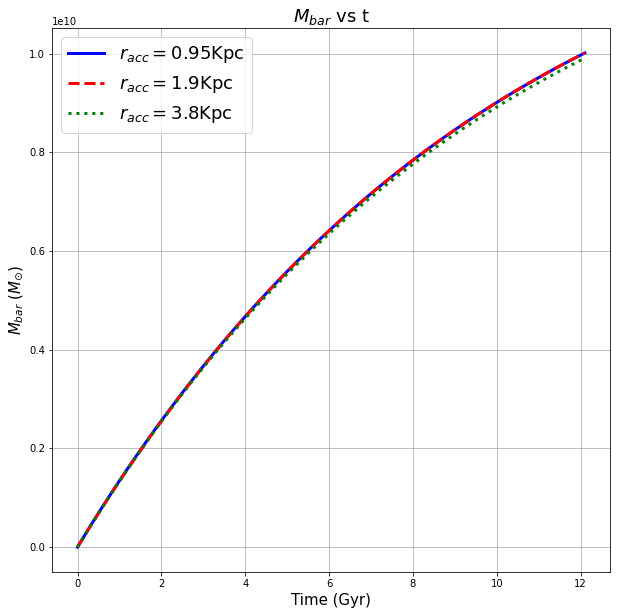

In [51]:
Mass_time_bar_r1 = [np.sum(x) for x in zip(Mass_time_star_r1, Mass_gas_summed_r1)]
Mass_time_bar_r2 = [np.sum(x) for x in zip(Mass_time_star_r2, Mass_gas_summed_r2)]
Mass_time_bar_r3 = [np.sum(x) for x in zip(Mass_time_star_r3, Mass_gas_summed_r3)]

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, Mass_time_bar_r1, label=r"$r_{acc} = 0.95$Kpc", color="blue", lw=3)
frame.plot(M_time, Mass_time_bar_r2, label=r"$r_{acc} = 1.9$Kpc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, Mass_time_bar_r3, label=r"$r_{acc} = 3.8$Kpc", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$M_{bar}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$M_{bar}$ $(M_{\odot})$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/M_bar vs time (r_acc variation).png')

#  Global $f_{gas}$ vs t (with varying $r_{acc}$)

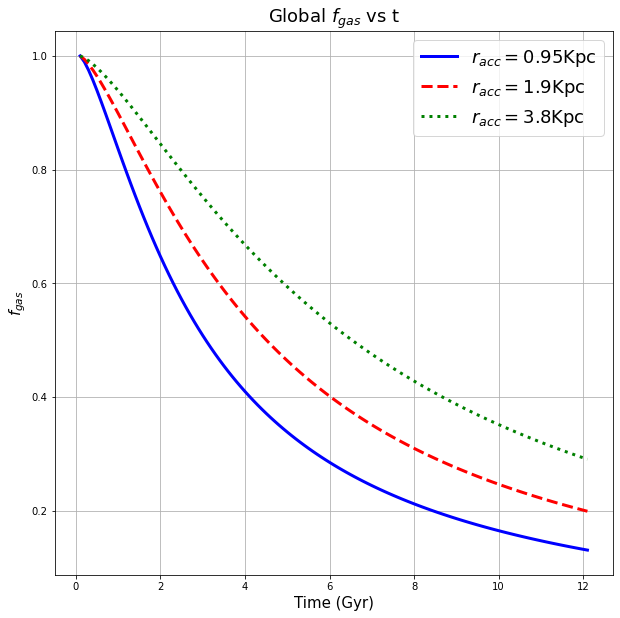

In [52]:
warnings.filterwarnings('ignore')

f_global_gas_r1 = np.divide(Mass_gas_summed_r1, Mass_time_bar_r1)
f_global_gas_r2 = np.divide(Mass_gas_summed_r2, Mass_time_bar_r2)
f_global_gas_r3 = np.divide(Mass_gas_summed_r3, Mass_time_bar_r3)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, f_global_gas_r2, label=r"$r_{acc} = 0.95$Kpc", color="blue", lw=3)
frame.plot(M_time, f_global_gas_r1, label=r"$r_{acc} = 1.9$Kpc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, f_global_gas_r3, label=r"$r_{acc} = 3.8$Kpc", linestyle="dotted", color="green", lw=3)
frame.set_title(r"Global $f_{gas}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/Global f_gas vs time (r_acc variation).png')

In [53]:
warnings.filterwarnings('default')

## $v_{rot}$ vs t

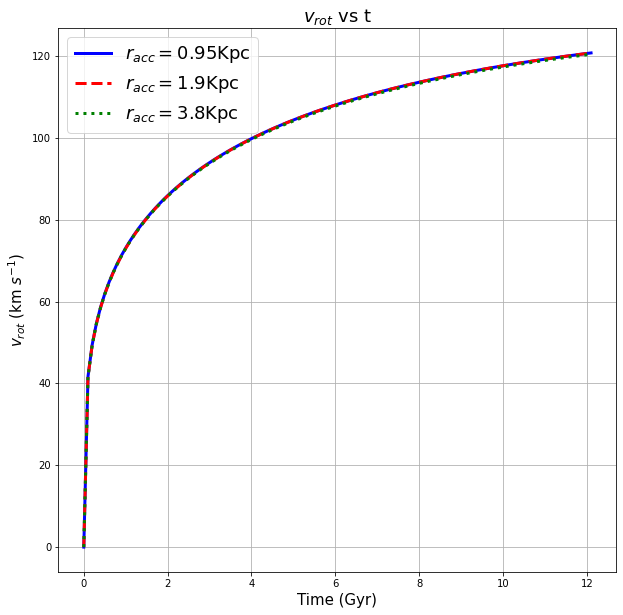

In [54]:
Ag = 47 #M_{\odot} km^{-4} s^{-4} 
v_rot_r1 = (np.array(Mass_time_bar_r1)/Ag)**0.25
v_rot_r2 = (np.array(Mass_time_bar_r2)/Ag)**0.25
v_rot_r3 = (np.array(Mass_time_bar_r3)/Ag)**0.25

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, v_rot_r1, label=r"$r_{acc} = 0.95$Kpc", color="blue", lw=3)
frame.plot(M_time, v_rot_r2, label=r"$r_{acc} = 1.9$Kpc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, v_rot_r3, label=r"$r_{acc} = 3.8$Kpc", linestyle="dotted", color="green", lw=3)
frame.set_title(r"$v_{rot}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$v_{rot}$ (km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/v_rot vs time (r_acc variation).png')

# Specific Angular Momentum $j_{bar}$  (with varying $t_{acc}$)

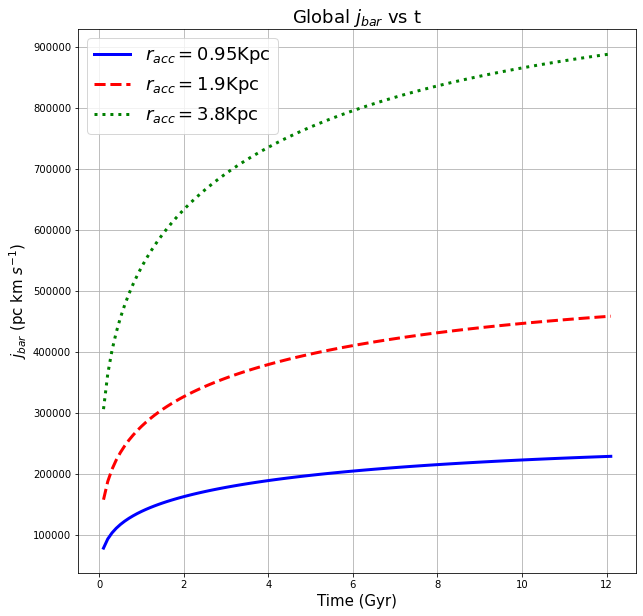

In [55]:
warnings.filterwarnings('ignore')
dr = 10
M_time = M_t[-1,:]
Nominator_gas_r1 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sigma_r1, axis=0)
Nominator_gas_r2 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sigma_r2, axis=0)
Nominator_gas_r3 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sigma_r3, axis=0)

Nominator_star_r1 = []
Nominator_star_r2 = []
Nominator_star_r3 = []
sfr_r_squared_r1 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sfr_r1, axis=0)
sfr_r_squared_r2 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sfr_r2, axis=0)
sfr_r_squared_r3 = 2*np.pi*dr*np.sum(r.reshape(2510,1)**2*M_sfr_r3, axis=0)
dt = 0.1

for i in range(len(M_time)):
    Nominator_star_r1.append(dt*np.sum(sfr_r_squared_r1[:i]))
    Nominator_star_r2.append(dt*np.sum(sfr_r_squared_r2[:i]))
    Nominator_star_r3.append(dt*np.sum(sfr_r_squared_r3[:i]))

Nominator_bar_r1 = [np.sum(x) for x in zip(Nominator_star_r1, Nominator_gas_r1)]
Nominator_bar_r2 = [np.sum(x) for x in zip(Nominator_star_r2, Nominator_gas_r2)]
Nominator_bar_r3 = [np.sum(x) for x in zip(Nominator_star_r3, Nominator_gas_r3)]

Nominator_r1 = v_rot_r1*Nominator_bar_r1
Nominator_r2 = v_rot_r2*Nominator_bar_r2
Nominator_r3 = v_rot_r3*Nominator_bar_r3

j_bar_r1 = np.divide(Nominator_r1,Mass_time_bar_r1)
j_bar_r2 = np.divide(Nominator_r2,Mass_time_bar_r2)
j_bar_r3 = np.divide(Nominator_r3,Mass_time_bar_r3)
#print(j_bar1)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, j_bar_r2, label=r"$r_{acc} = 0.95$Kpc", color="blue", lw=3)
frame.plot(M_time, j_bar_r1, label=r"$r_{acc} = 1.9$Kpc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, j_bar_r3, label=r"$r_{acc} = 3.8$Kpc", linestyle="dotted", color="green", lw=3)
frame.set_title(r"Global $j_{bar}$ vs t", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$j_{bar}$ (pc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/Global j_bar vs time (r_acc variation).png')

# Comparison with observed data

## Defining remaining arrays

In [51]:
dt = 0.1
N = 1.4 #below
A = 0.1625 # with N above used in K-S law
Rf = 0.3 #return factor

def Sigma_definer(r,r_acc,t_acc,C):
    """This fucntion defines the gas surface density 2D array, 
    where the columns are for varying radius, and the rows are for varying time.
    As input it takes:
    r = the radius 1D array, giving the max and min values of the radius of a galaxy
    r_acc = radial scale length of accretion
    t_acc = accretion timescale
    C = Gives value of the desired baryonic mass at a time t (usually t_0)
    """
    M_sigma = np.zeros(len(r)*len(x_rk1)).reshape(len(r),len(x_rk1))
    for i,r_value in enumerate(r):
        def dydx(t,S):
            return (C/(2*np.pi*(r_acc**2)))*np.exp(-t/t_acc)*np.exp(-r_value/r_acc)-A*(1-Rf)*(S**N)
        #print(r_value)
        x0 = 0
        y0 = 0
        dx = 0.1
        x_end = 12

        S_1 = np.zeros(len(x_rk2))
        t_1 = np.zeros(len(x_rk2))

        y = y0
        x = x0
        j=1
        while x <= x_end:

            x, y = RungeKutta(x, y, dx, dydx)
            #print(x,y)
            #t_1[j] = np.round(x,1)
            S_1[j] = y
            j+=1

        M_sigma[i,:] = S_1
    return M_sigma

def Definer(Mbar, t_acc, res=120, Rmax=100.1):
    """Defines the fraction of gas and baryonic specific angular momentum arrays, with Mbar and t_acc as input"""
    r_acc = 10**(0.385*(np.log10(Mbar)-10)+0.281)
    C = Mbar/(t_acc*(1-np.exp(-12/t_acc)))
    r = np.arange(0,1000*Rmax,res)
    dr = res
    
    r_acc1 = r_acc*1000
    r_acc2 = r_acc1/2
    r_acc3 = r_acc1*2
    
    M_sigma_r1 = Sigma_definer(r,r_acc1,t_acc,C)
    M_sigma_r2 = Sigma_definer(r,r_acc2,t_acc,C)
    M_sigma_r3 = Sigma_definer(r,r_acc3,t_acc,C)

    M_sfr_r1 = A*(1-Rf)*M_sigma_r1**N
    M_sfr_r2 = A*(1-Rf)*M_sigma_r2**N
    M_sfr_r3 = A*(1-Rf)*M_sigma_r3**N
    
    M_time = M_t[-1,:]
    r = r.reshape(len(r),1)
    Mass_gas_summed_r1 = 2*np.pi*dr*np.sum(r*M_sigma_r1, axis=0)
    Mass_gas_summed_r2 = 2*np.pi*dr*np.sum(r*M_sigma_r2, axis=0)
    Mass_gas_summed_r3 = 2*np.pi*dr*np.sum(r*M_sigma_r3, axis=0)
    
    Mass_time_star_r1 = []
    Mass_time_star_r2 = []
    Mass_time_star_r3 = []
    Mass_sfr_summed_r1 = 2*np.pi*dr*np.sum(r*M_sfr_r1, axis=0)
    Mass_sfr_summed_r2 = 2*np.pi*dr*np.sum(r*M_sfr_r2, axis=0)
    Mass_sfr_summed_r3 = 2*np.pi*dr*np.sum(r*M_sfr_r3, axis=0)

    for i in range(len(M_time)):
        Mass_time_star_r1.append(dt*np.sum(Mass_sfr_summed_r1[:i]))
        Mass_time_star_r2.append(dt*np.sum(Mass_sfr_summed_r2[:i]))
        Mass_time_star_r3.append(dt*np.sum(Mass_sfr_summed_r3[:i]))

    Mass_time_bar_r1 = [np.sum(x) for x in zip(Mass_time_star_r1, Mass_gas_summed_r1)]
    Mass_time_bar_r2 = [np.sum(x) for x in zip(Mass_time_star_r2, Mass_gas_summed_r2)]
    Mass_time_bar_r3 = [np.sum(x) for x in zip(Mass_time_star_r3, Mass_gas_summed_r3)]
    
    f_global_gas_r1 = np.divide(Mass_gas_summed_r1, Mass_time_bar_r1)
    f_global_gas_r2 = np.divide(Mass_gas_summed_r2, Mass_time_bar_r2)
    f_global_gas_r3 = np.divide(Mass_gas_summed_r3, Mass_time_bar_r3)
    
    Ag = 47 #M_{\odot} km^{-4} s^{-4} 
    v_rot_r1 = (np.array(Mass_time_bar_r1)/Ag)**0.25
    v_rot_r2 = (np.array(Mass_time_bar_r2)/Ag)**0.25
    v_rot_r3 = (np.array(Mass_time_bar_r3)/Ag)**0.25
    
    Nominator_gas_r1 = 2*np.pi*dr*np.sum(r**2*M_sigma_r1, axis=0)
    Nominator_gas_r2 = 2*np.pi*dr*np.sum(r**2*M_sigma_r2, axis=0)
    Nominator_gas_r3 = 2*np.pi*dr*np.sum(r**2*M_sigma_r3, axis=0)

    Nominator_star_r1 = []
    Nominator_star_r2 = []
    Nominator_star_r3 = []
    sfr_r_squared_r1 = 2*np.pi*dr*np.sum(r**2*M_sfr_r1, axis=0)
    sfr_r_squared_r2 = 2*np.pi*dr*np.sum(r**2*M_sfr_r2, axis=0)
    sfr_r_squared_r3 = 2*np.pi*dr*np.sum(r**2*M_sfr_r3, axis=0)

    for i in range(len(M_time)):
        Nominator_star_r1.append(dt*np.sum(sfr_r_squared_r1[:i]))
        Nominator_star_r2.append(dt*np.sum(sfr_r_squared_r2[:i]))
        Nominator_star_r3.append(dt*np.sum(sfr_r_squared_r3[:i]))

    Nominator_bar_r1 = [np.sum(x) for x in zip(Nominator_star_r1, Nominator_gas_r1)]
    Nominator_bar_r2 = [np.sum(x) for x in zip(Nominator_star_r2, Nominator_gas_r2)]
    Nominator_bar_r3 = [np.sum(x) for x in zip(Nominator_star_r3, Nominator_gas_r3)]

    Nominator_r1 = v_rot_r1*Nominator_bar_r1
    Nominator_r2 = v_rot_r2*Nominator_bar_r2
    Nominator_r3 = v_rot_r3*Nominator_bar_r3

    j_bar_r1 = np.divide(Nominator_r1,Mass_time_bar_r1)
    j_bar_r2 = np.divide(Nominator_r2,Mass_time_bar_r2)
    j_bar_r3 = np.divide(Nominator_r3,Mass_time_bar_r3)
    
    f_gas_array = np.array([f_global_gas_r1[-1], f_global_gas_r2[-1], f_global_gas_r3[-1]])
    j_bar_array = np.array([j_bar_r1[-1]/1000, j_bar_r2[-1]/1000, j_bar_r3[-1]/1000])
    
    return f_gas_array, j_bar_array


In [52]:
f_gas_array_3_10, j_bar_array_3_10 = Definer(10**10, 3)
f_gas_array_25_10, j_bar_array_25_10 = Definer(10**10, 25)
f_gas_array_3_8, j_bar_array_3_8 = Definer(10**8, 3)
f_gas_array_10_8, j_bar_array_10_8 = Definer(10**8, 10)
f_gas_array_25_8, j_bar_array_25_8 = Definer(10**8, 25)

#This defines everything :)

## $log(j_{bar})$ vs $log(f_{gas})$

### $M_{bar} = 10^{10} M_{\odot}$

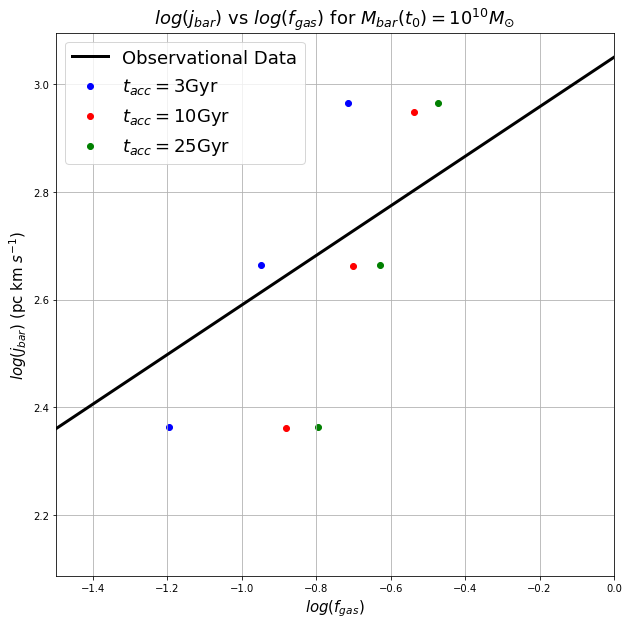

In [53]:
def pavel(M,f):
    """Returns the specific angular momentum from the linear equation 
    found by Pavel Mancera Piña, which can be plotted. Takes inputs:
    M = Baryonic mass
    f = gas fraction"""
    j = 0.73*np.log10(M)+0.46*np.log10(f)-4.25
    return j

Mass_1 = 10**10
f_gas_array = np.linspace(0,1,100)

log_f_gas_obs = np.log10(f_gas_array)
log_j_bar_obs_10 = pavel(Mass_1, f_gas_array)

log_f_gas2_10 = np.log10(np.array([f_global_gas_r1[-1], f_global_gas_r2[-1], f_global_gas_r3[-1]]))
log_j_bar2_10 = np.log10(np.array([j_bar_r1[-1]/1000, j_bar_r2[-1]/1000, j_bar_r3[-1]/1000]))
log_f_gas1_10 = np.log10(f_gas_array_3_10)
log_j_bar1_10 = np.log10(j_bar_array_3_10)
log_f_gas3_10 = np.log10(f_gas_array_25_10)
log_j_bar3_10 = np.log10(j_bar_array_25_10)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(log_f_gas_obs, log_j_bar_obs_10, label="Observational Data", color="k", lw=3)
frame.scatter(log_f_gas1_10, log_j_bar1_10, label=r"$t_{acc} = 3$Gyr", color="blue")
frame.scatter(log_f_gas2_10, log_j_bar2_10, label=r"$t_{acc} = 10$Gyr", color="red")
frame.scatter(log_f_gas3_10, log_j_bar3_10, label=r"$t_{acc} = 25$Gyr", color="green")
frame.set_title(r"$log(j_{bar})$ vs $log(f_{gas})$ for $M_{bar}(t_0) = 10^{10} M_{\odot}$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel(r"$log(f_{gas})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (pc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.set_xlim(-1.5,0)
frame.grid()
show()
fig.savefig('graphs/log j_bar vs f_gas (M_bar = 10^10).png')

### $M_{bar} = 10^{8} M_{\odot}$

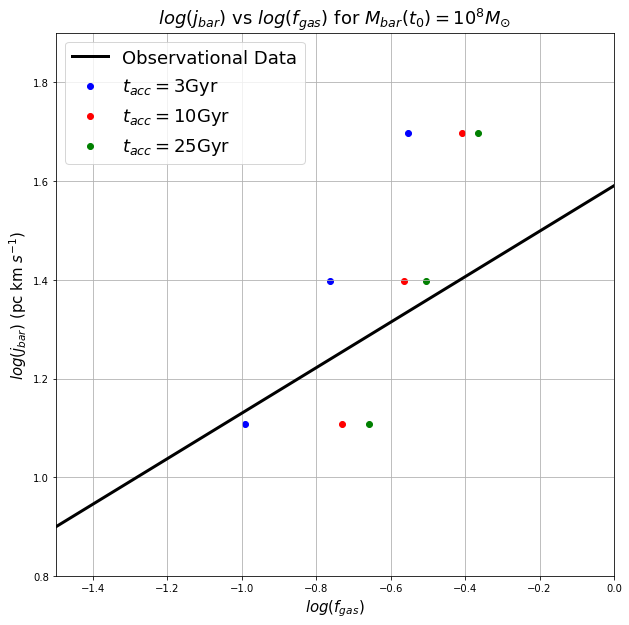

In [54]:
Mass_2 = 10**8
log_j_bar_obs_8 = pavel(Mass_2, f_gas_array)

log_f_gas2_8 = np.log10(f_gas_array_10_8)
log_j_bar2_8 = np.log10(j_bar_array_10_8)
log_f_gas1_8 = np.log10(f_gas_array_3_8)
log_j_bar1_8 = np.log10(j_bar_array_3_8)
log_f_gas3_8 = np.log10(f_gas_array_25_8)
log_j_bar3_8 = np.log10(j_bar_array_25_8)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(log_f_gas_obs, log_j_bar_obs_8, label="Observational Data", color="k", lw=3)
frame.scatter(log_f_gas1_8, log_j_bar1_8, label=r"$t_{acc} = 3$Gyr", color="blue")
frame.scatter(log_f_gas2_8, log_j_bar2_8, label=r"$t_{acc} = 10$Gyr", color="red")
frame.scatter(log_f_gas3_8, log_j_bar3_8, label=r"$t_{acc} = 25$Gyr", color="green")
frame.set_title(r"$log(j_{bar})$ vs $log(f_{gas})$ for $M_{bar}(t_0) = 10^8 M_{\odot}$", fontsize = 18) #r"$\frac{\mathrm{d} \Sigma_{gas}(t,R)}{\mathrm{d} t} = \frac{M_{bar}(t_0)}{2 \pi r_{acc}^2 t_{acc}[1-e^{-(\frac{t_0}{t_{acc}})}]} e^{-\frac{t}{t_{acc}}} e^{-\frac{R}{r_{acc}}} - A(1-\Re) \Sigma_{gas}^N(t,R)$"
frame.set_xlabel(r"$log(f_{gas})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (pc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.set_xlim(-1.5,0)
frame.set_ylim(0.8,1.9)
frame.grid()
show()
fig.savefig('graphs/log j_bar vs f_gas (M_bar = 10^8).png')

# Plot of Pavel's data

### $M_{bar} = 10^{8} M_{\odot}$

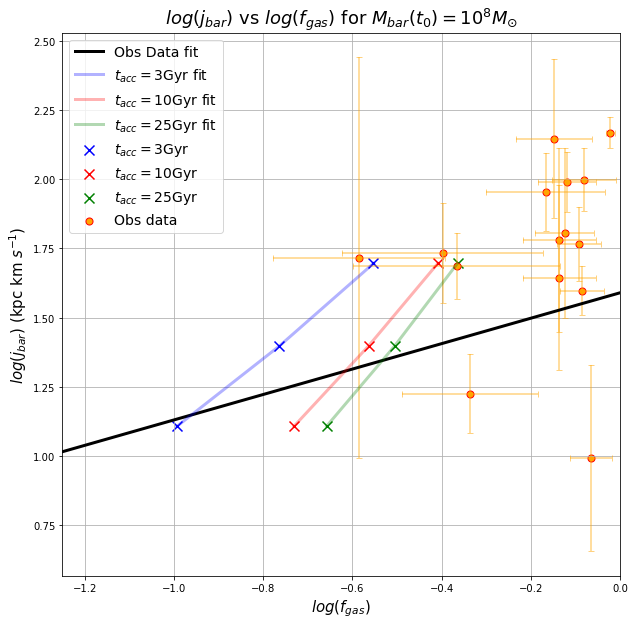

In [55]:
BARY = pd.read_csv('baryons.csv')
BARY_8 = pd.read_csv('baryons_8.csv')
BARY_10 = pd.read_csv('baryons_10.csv')

BARY['j'] =  pd.to_numeric(BARY['j'], errors='coerce')
BARY['e_j'] =  pd.to_numeric(BARY['e_j'], errors='coerce')
BARY['fgas'] =  pd.to_numeric(BARY['fgas'], errors='coerce')
BARY['e_fgas'] =  pd.to_numeric(BARY['e_fgas'], errors='coerce')

BARY_8['j'] =  pd.to_numeric(BARY_8['j'], errors='coerce')
BARY_8['e_j'] =  pd.to_numeric(BARY_8['e_j'], errors='coerce')
BARY_8['fgas'] =  pd.to_numeric(BARY_8['fgas'], errors='coerce')
BARY_8['e_fgas'] =  pd.to_numeric(BARY_8['e_fgas'], errors='coerce')

BARY_10['j'] =  pd.to_numeric(BARY_10['j'], errors='coerce')
BARY_10['e_j'] =  pd.to_numeric(BARY_10['e_j'], errors='coerce')
BARY_10['fgas'] =  pd.to_numeric(BARY_10['fgas'], errors='coerce')
BARY_10['e_fgas'] =  pd.to_numeric(BARY_10['e_fgas'], errors='coerce')

obs_fgas_8 = np.log10(BARY_8['fgas'])
obs_fgas_errors_8 = BARY_8['e_fgas']/BARY_8['fgas']
obs_jbar_8 = np.log10(BARY_8['j'])
obs_jbar_errors_8 = BARY_8['e_j']/BARY_8['j']

f_gas1_ipl_8 = np.linspace(log_f_gas1_8.min(),log_f_gas1_8.max(),100)
ip1_1_8 = interp1d(log_f_gas1_8, log_j_bar1_8, kind='linear')
j_bar1_ipl_8 = ip1_1_8(f_gas1_ipl_8)

f_gas2_ipl_8 = np.linspace(log_f_gas2_8.min(),log_f_gas2_8.max(),100)
ip1_2_8 = interp1d(log_f_gas2_8, log_j_bar2_8, kind='linear')
j_bar2_ipl_8 = ip1_2_8(f_gas2_ipl_8)

f_gas3_ipl_8 = np.linspace(log_f_gas3_8.min(),log_f_gas3_8.max(),100)
ip1_3_8 = interp1d(log_f_gas3_8, log_j_bar3_8, kind='linear')
j_bar3_ipl_8 = ip1_3_8(f_gas3_ipl_8)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(log_f_gas_obs, log_j_bar_obs_8, label="Obs Data fit", color="k", lw=3)
frame.plot(f_gas1_ipl_8, j_bar1_ipl_8, label=r"$t_{acc} = 3$Gyr fit", color="blue", lw=3, alpha=0.3)
frame.plot(f_gas2_ipl_8, j_bar2_ipl_8, label=r"$t_{acc} = 10$Gyr fit", color="red", lw=3, alpha=0.3)
frame.plot(f_gas3_ipl_8, j_bar3_ipl_8, label=r"$t_{acc} = 25$Gyr fit", color="green", lw=3, alpha=0.3)
frame.scatter(log_f_gas1_8, log_j_bar1_8, label=r"$t_{acc} = 3$Gyr", marker="x", color="blue", s=100)
frame.scatter(log_f_gas2_8, log_j_bar2_8, label=r"$t_{acc} = 10$Gyr", marker="x", color="red", s=100)
frame.scatter(log_f_gas3_8, log_j_bar3_8, label=r"$t_{acc} = 25$Gyr", marker="x", color="green", s=100)
frame.scatter(obs_fgas_8, obs_jbar_8, label="Obs data", facecolors='orange', edgecolors='r', s=50)
frame.errorbar(obs_fgas_8, obs_jbar_8, xerr=obs_fgas_errors_8, yerr=obs_jbar_errors_8, fmt = ' ', ecolor = 'orange', capsize = 3, alpha=0.5)
frame.set_title(r"$log(j_{bar})$ vs $log(f_{gas})$ for $M_{bar}(t_0) = 10^8 M_{\odot}$", fontsize = 18)
frame.set_xlabel(r"$log(f_{gas})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 14})
frame.set_xlim(-1.25,0)
frame.grid()
show()
fig.savefig('graphs/log j_bar vs f_gas (M_bar = 10^8) with Pavel.png')

### $M_{bar} = 10^{10} M_{\odot}$

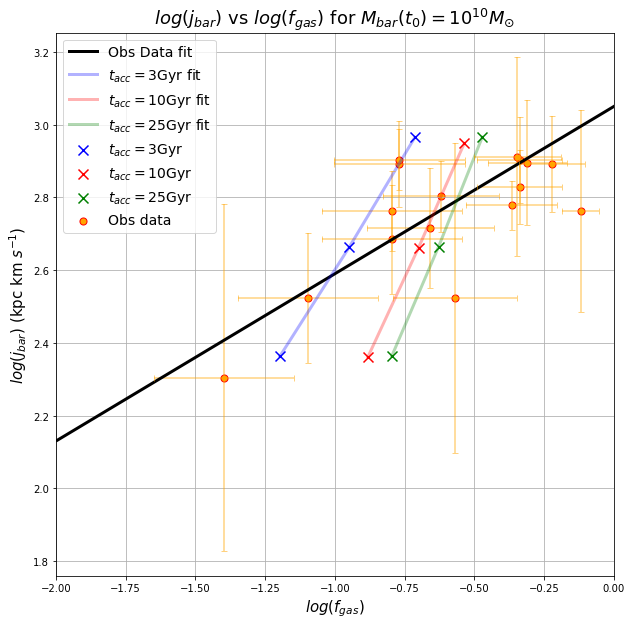

In [56]:
obs_fgas_10 = np.log10(BARY_10['fgas'])
obs_fgas_errors_10 = BARY_10['e_fgas']/BARY_10['fgas']
obs_jbar_10 = np.log10(BARY_10['j'])
obs_jbar_errors_10 = BARY_10['e_j']/BARY_10['j']

f_gas1_ipl_10 = np.linspace(log_f_gas1_10.min(),log_f_gas1_10.max(),100)
ip1_1_10 = interp1d(log_f_gas1_10, log_j_bar1_10, kind='linear')
j_bar1_ipl_10 = ip1_1_10(f_gas1_ipl_10)

f_gas2_ipl_10 = np.linspace(log_f_gas2_10.min(),log_f_gas2_10.max(),100)
ip1_2_10 = interp1d(log_f_gas2_10, log_j_bar2_10, kind='linear')
j_bar2_ipl_10 = ip1_2_10(f_gas2_ipl_10)

f_gas3_ipl_10 = np.linspace(log_f_gas3_10.min(),log_f_gas3_10.max(),100)
ip1_3_10 = interp1d(log_f_gas3_10, log_j_bar3_10, kind='linear')
j_bar3_ipl_10 = ip1_3_10(f_gas3_ipl_10)

fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(log_f_gas_obs, log_j_bar_obs_10, label="Obs Data fit", color="k", lw=3)
frame.plot(f_gas1_ipl_10, j_bar1_ipl_10, label=r"$t_{acc} = 3$Gyr fit", color="blue", lw=3, alpha=0.3)
frame.plot(f_gas2_ipl_10, j_bar2_ipl_10, label=r"$t_{acc} = 10$Gyr fit", color="red", lw=3, alpha=0.3)
frame.plot(f_gas3_ipl_10, j_bar3_ipl_10, label=r"$t_{acc} = 25$Gyr fit", color="green", lw=3, alpha=0.3)
frame.scatter(log_f_gas1_10, log_j_bar1_10, label=r"$t_{acc} = 3$Gyr", marker="x", color="blue", s=100)
frame.scatter(log_f_gas2_10, log_j_bar2_10, label=r"$t_{acc} = 10$Gyr", marker="x", color="red", s=100)
frame.scatter(log_f_gas3_10, log_j_bar3_10, label=r"$t_{acc} = 25$Gyr", marker="x", color="green", s=100)
frame.scatter(obs_fgas_10, obs_jbar_10, label="Obs data", facecolors='orange', edgecolors='r', s=50)
frame.errorbar(obs_fgas_10, obs_jbar_10, xerr=obs_fgas_errors_10, yerr=obs_jbar_errors_10, fmt = ' ', ecolor = 'orange', capsize = 3, alpha=0.5)
frame.set_title(r"$log(j_{bar})$ vs $log(f_{gas})$ for $M_{bar}(t_0) = 10^{10} M_{\odot}$", fontsize = 18)
frame.set_xlabel(r"$log(f_{gas})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 14})
frame.set_xlim(-2,0)
frame.grid()
show()
fig.savefig('graphs/log j_bar vs f_gas (M_bar = 10^10) with Pavel.png')

# $log(j_{bar})$ vs $log(M_{bar})$

## $t_{acc}=3$Gyr

In [57]:
#12 min to run for 50 masses and 3 r_acc

log_M_bar_array = np.linspace(8,11.5,50)
#print(M_bar_array)
f_gas_array_3 = np.zeros((len(log_M_bar_array),3))
#print(f_gas_array)
j_bar_array_3 = np.zeros((len(log_M_bar_array),3))
#print(j_bar_array[i,:])

for i,M in enumerate(log_M_bar_array):
    f_gas_temp, j_bar_temp = Definer(10**M,3)
    f_gas_array_3[i] = f_gas_temp
    j_bar_array_3[i] = j_bar_temp

KeyboardInterrupt: 

In [ ]:
log_f_gas_array_3 = np.log10(f_gas_array_3)
log_j_bar_array_3 = np.log10(j_bar_array_3)

log_j_bar_obs_f01 = pavel(10**(log_M_bar_array),0.1)
log_j_bar_obs_f03 = pavel(10**(log_M_bar_array),0.3)
log_j_bar_obs_f10 = pavel(10**(log_M_bar_array),1.0)

obs_Mbar = np.log10(BARY['Mass(Msun)'])
obs_Mbar_errors = BARY['e_Mass(Msun)']/BARY['Mass(Msun)']
obs_jbar = np.log10(BARY['j'])
obs_jbar_errors = BARY['e_j']/BARY['j']
obs_fgas = np.log10(BARY['fgas'])
obs_fgas_errors = BARY['e_fgas']/BARY['fgas']

cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
#frame.plot(log_M_bar_array, log_j_bar_obs_f01, label=r"$f_{gas}=0.1$", color="r", lw=2)
#frame.plot(log_M_bar_array, log_j_bar_obs_f03, label=r"$f_{gas}=0.3$", color="g", lw=2)
#frame.plot(log_M_bar_array, log_j_bar_obs_f10, label=r"$f_{gas}=1.0$", color="b", lw=2)

#Model
divider = make_axes_locatable(frame)
colbarframe1 = divider.append_axes("right", size="5%", pad=0.15)
for x, y, z in zip(log_M_bar_array, log_j_bar_array_3, f_gas_array_3):
    gg = frame.scatter([x]*len(y), y, facecolors=cmap(z), s=50)
gg.set_label("Model")
cbar1 = fig.colorbar(gg, cax=colbarframe1)
cbar1.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

#Data
frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), s=50, alpha=0.8)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 3$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=3Gyr with Pavel.png')

## $t_{acc}=25$Gyr

In [ ]:
f_gas_array_25 = np.zeros((len(log_M_bar_array),3))
#print(f_gas_array)
j_bar_array_25 = np.zeros((len(log_M_bar_array),3))
#print(j_bar_array[i,:])

for i,M in enumerate(log_M_bar_array):
    f_gas_temp, j_bar_temp = Definer(10**M,25)
    f_gas_array_25[i] = f_gas_temp
    j_bar_array_25[i] = j_bar_temp

In [ ]:
log_f_gas_array_25 = np.log10(f_gas_array_25)
log_j_bar_array_25 = np.log10(j_bar_array_25)

cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
#frame.plot(log_M_bar_array, log_j_bar_obs_f01, label=r"$f_{gas}=0.1$", color="r", lw=2)
#frame.plot(log_M_bar_array, log_j_bar_obs_f03, label=r"$f_{gas}=0.3$", color="g", lw=2)
#frame.plot(log_M_bar_array, log_j_bar_obs_f10, label=r"$f_{gas}=1.0$", color="b", lw=2)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)
for x, y, z in zip(log_M_bar_array, log_j_bar_array_25, f_gas_array_25):
    gg = frame.scatter([x]*len(y), y, facecolors=cmap(z), s=50)
gg.set_label("Model")
cbar = fig.colorbar(gg, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

#Data
frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), s=70, alpha=0.8)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 25$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=25Gyr with Pavel.png')

## Improved function (for multiple $r_{acc}$).

In [ ]:
def Full_definer(Mbar, t_acc, res=120, Rmax=100.1):
    """Defines the fraction of gas and baryonic specific angular momentum arrays, with Mbar and t_acc as input"""
    r_acc = 10**(0.385*(np.log10(Mbar)-10)+0.281)
    C = Mbar/(t_acc*(1-np.exp(-12/t_acc)))
    r = np.arange(0,1000*Rmax,res)
    dr = res
    
    r_acc *= 1000
    r_acc_array = np.linspace(r_acc/2, r_acc*2, 10)
    
    #M_sigma_r = np.zeros(10,len(r))
    #M_sfr_r = np.zeros(10,len(r))
    #for i,r_acc in enumerate(r_acc_array):
    #    M_sigma_r[i] = Sigma_definer(r,r_acc,t_acc,C)
    #    M_sfr_r[i] = A*(1-Rf)*M_sigma_r[i]**N
    
    M_sigma_r1 = Sigma_definer(r,r_acc_array[0],t_acc,C)
    M_sigma_r2 = Sigma_definer(r,r_acc_array[1],t_acc,C)
    M_sigma_r3 = Sigma_definer(r,r_acc_array[2],t_acc,C)
    M_sigma_r4 = Sigma_definer(r,r_acc_array[3],t_acc,C)
    M_sigma_r5 = Sigma_definer(r,r_acc_array[4],t_acc,C)
    M_sigma_r6 = Sigma_definer(r,r_acc_array[5],t_acc,C)
    M_sigma_r7 = Sigma_definer(r,r_acc_array[6],t_acc,C)
    M_sigma_r8 = Sigma_definer(r,r_acc_array[7],t_acc,C)
    M_sigma_r9 = Sigma_definer(r,r_acc_array[8],t_acc,C)
    M_sigma_r10 = Sigma_definer(r,r_acc_array[9],t_acc,C)
    
    M_sfr_r1 = A*(1-Rf)*M_sigma_r1**N
    M_sfr_r2 = A*(1-Rf)*M_sigma_r2**N
    M_sfr_r3 = A*(1-Rf)*M_sigma_r3**N
    M_sfr_r4 = A*(1-Rf)*M_sigma_r4**N
    M_sfr_r5 = A*(1-Rf)*M_sigma_r5**N
    M_sfr_r6 = A*(1-Rf)*M_sigma_r6**N
    M_sfr_r7 = A*(1-Rf)*M_sigma_r7**N
    M_sfr_r8 = A*(1-Rf)*M_sigma_r8**N
    M_sfr_r9 = A*(1-Rf)*M_sigma_r9**N
    M_sfr_r10 = A*(1-Rf)*M_sigma_r10**N
    
    r = r.reshape(len(r),1)
    #Mass_gas_summed_r = np.zeros(10,len(r))
    #for i in range(len(r_acc_array)):
    #    Mass_gas_summed_r[i] = 2*np.pi*dr*np.sum(r*M_sigma_r[i], axis=0)
    
    Mass_gas_summed_r1 = 2*np.pi*dr*np.sum(r*M_sigma_r1, axis=0)
    Mass_gas_summed_r2 = 2*np.pi*dr*np.sum(r*M_sigma_r2, axis=0)
    Mass_gas_summed_r3 = 2*np.pi*dr*np.sum(r*M_sigma_r3, axis=0)
    Mass_gas_summed_r4 = 2*np.pi*dr*np.sum(r*M_sigma_r4, axis=0)
    Mass_gas_summed_r5 = 2*np.pi*dr*np.sum(r*M_sigma_r5, axis=0)
    Mass_gas_summed_r6 = 2*np.pi*dr*np.sum(r*M_sigma_r6, axis=0)
    Mass_gas_summed_r7 = 2*np.pi*dr*np.sum(r*M_sigma_r7, axis=0)
    Mass_gas_summed_r8 = 2*np.pi*dr*np.sum(r*M_sigma_r8, axis=0)
    Mass_gas_summed_r9 = 2*np.pi*dr*np.sum(r*M_sigma_r9, axis=0)
    Mass_gas_summed_r10 = 2*np.pi*dr*np.sum(r*M_sigma_r10, axis=0)
    
    Mass_time_star_r1 = []
    Mass_time_star_r2 = []
    Mass_time_star_r3 = []
    Mass_time_star_r4 = []
    Mass_time_star_r5 = []
    Mass_time_star_r6 = []
    Mass_time_star_r7 = []
    Mass_time_star_r8 = []
    Mass_time_star_r9 = []
    Mass_time_star_r10 = []
    Mass_sfr_summed_r1 = 2*np.pi*dr*np.sum(r*M_sfr_r1, axis=0)
    Mass_sfr_summed_r2 = 2*np.pi*dr*np.sum(r*M_sfr_r2, axis=0)
    Mass_sfr_summed_r3 = 2*np.pi*dr*np.sum(r*M_sfr_r3, axis=0)
    Mass_sfr_summed_r4 = 2*np.pi*dr*np.sum(r*M_sfr_r4, axis=0)
    Mass_sfr_summed_r5 = 2*np.pi*dr*np.sum(r*M_sfr_r5, axis=0)
    Mass_sfr_summed_r6 = 2*np.pi*dr*np.sum(r*M_sfr_r6, axis=0)
    Mass_sfr_summed_r7 = 2*np.pi*dr*np.sum(r*M_sfr_r7, axis=0)
    Mass_sfr_summed_r8 = 2*np.pi*dr*np.sum(r*M_sfr_r8, axis=0)
    Mass_sfr_summed_r9 = 2*np.pi*dr*np.sum(r*M_sfr_r9, axis=0)
    Mass_sfr_summed_r10 = 2*np.pi*dr*np.sum(r*M_sfr_r10, axis=0)

    for i in range(len(M_time)):
        Mass_time_star_r1.append(dt*np.sum(Mass_sfr_summed_r1[:i]))
        Mass_time_star_r2.append(dt*np.sum(Mass_sfr_summed_r2[:i]))
        Mass_time_star_r3.append(dt*np.sum(Mass_sfr_summed_r3[:i]))
        Mass_time_star_r4.append(dt*np.sum(Mass_sfr_summed_r4[:i]))
        Mass_time_star_r5.append(dt*np.sum(Mass_sfr_summed_r5[:i]))
        Mass_time_star_r6.append(dt*np.sum(Mass_sfr_summed_r6[:i]))
        Mass_time_star_r7.append(dt*np.sum(Mass_sfr_summed_r7[:i]))
        Mass_time_star_r8.append(dt*np.sum(Mass_sfr_summed_r8[:i]))
        Mass_time_star_r9.append(dt*np.sum(Mass_sfr_summed_r9[:i]))
        Mass_time_star_r10.append(dt*np.sum(Mass_sfr_summed_r10[:i]))

    Mass_time_bar_r1 = [np.sum(x) for x in zip(Mass_time_star_r1, Mass_gas_summed_r1)]
    Mass_time_bar_r2 = [np.sum(x) for x in zip(Mass_time_star_r2, Mass_gas_summed_r2)]
    Mass_time_bar_r3 = [np.sum(x) for x in zip(Mass_time_star_r3, Mass_gas_summed_r3)]
    Mass_time_bar_r4 = [np.sum(x) for x in zip(Mass_time_star_r4, Mass_gas_summed_r4)]
    Mass_time_bar_r5 = [np.sum(x) for x in zip(Mass_time_star_r5, Mass_gas_summed_r5)]
    Mass_time_bar_r6 = [np.sum(x) for x in zip(Mass_time_star_r6, Mass_gas_summed_r6)]
    Mass_time_bar_r7 = [np.sum(x) for x in zip(Mass_time_star_r7, Mass_gas_summed_r7)]
    Mass_time_bar_r8 = [np.sum(x) for x in zip(Mass_time_star_r8, Mass_gas_summed_r8)]
    Mass_time_bar_r9 = [np.sum(x) for x in zip(Mass_time_star_r9, Mass_gas_summed_r9)]
    Mass_time_bar_r10 = [np.sum(x) for x in zip(Mass_time_star_r10, Mass_gas_summed_r10)]
    
    f_global_gas_r1 = np.divide(Mass_gas_summed_r1, Mass_time_bar_r1)
    f_global_gas_r2 = np.divide(Mass_gas_summed_r2, Mass_time_bar_r2)
    f_global_gas_r3 = np.divide(Mass_gas_summed_r3, Mass_time_bar_r3)
    f_global_gas_r4 = np.divide(Mass_gas_summed_r4, Mass_time_bar_r4)
    f_global_gas_r5 = np.divide(Mass_gas_summed_r5, Mass_time_bar_r5)
    f_global_gas_r6 = np.divide(Mass_gas_summed_r6, Mass_time_bar_r6)
    f_global_gas_r7 = np.divide(Mass_gas_summed_r7, Mass_time_bar_r7)
    f_global_gas_r8 = np.divide(Mass_gas_summed_r8, Mass_time_bar_r8)
    f_global_gas_r9 = np.divide(Mass_gas_summed_r9, Mass_time_bar_r9)
    f_global_gas_r10 = np.divide(Mass_gas_summed_r10, Mass_time_bar_r10)
    
    Ag = 47 #M_{\odot} km^{-4} s^{-4} 
    v_rot_r1 = (np.array(Mass_time_bar_r1)/Ag)**0.25
    v_rot_r2 = (np.array(Mass_time_bar_r2)/Ag)**0.25
    v_rot_r3 = (np.array(Mass_time_bar_r3)/Ag)**0.25
    v_rot_r4 = (np.array(Mass_time_bar_r4)/Ag)**0.25
    v_rot_r5 = (np.array(Mass_time_bar_r5)/Ag)**0.25
    v_rot_r6 = (np.array(Mass_time_bar_r6)/Ag)**0.25
    v_rot_r7 = (np.array(Mass_time_bar_r7)/Ag)**0.25
    v_rot_r8 = (np.array(Mass_time_bar_r8)/Ag)**0.25
    v_rot_r9 = (np.array(Mass_time_bar_r9)/Ag)**0.25
    v_rot_r10 = (np.array(Mass_time_bar_r10)/Ag)**0.25
    
    Nominator_gas_r1 = 2*np.pi*dr*np.sum(r**2*M_sigma_r1, axis=0)
    Nominator_gas_r2 = 2*np.pi*dr*np.sum(r**2*M_sigma_r2, axis=0)
    Nominator_gas_r3 = 2*np.pi*dr*np.sum(r**2*M_sigma_r3, axis=0)
    Nominator_gas_r4 = 2*np.pi*dr*np.sum(r**2*M_sigma_r4, axis=0)
    Nominator_gas_r5 = 2*np.pi*dr*np.sum(r**2*M_sigma_r5, axis=0)
    Nominator_gas_r6 = 2*np.pi*dr*np.sum(r**2*M_sigma_r6, axis=0)
    Nominator_gas_r7 = 2*np.pi*dr*np.sum(r**2*M_sigma_r7, axis=0)
    Nominator_gas_r8 = 2*np.pi*dr*np.sum(r**2*M_sigma_r8, axis=0)
    Nominator_gas_r9 = 2*np.pi*dr*np.sum(r**2*M_sigma_r9, axis=0)
    Nominator_gas_r10 = 2*np.pi*dr*np.sum(r**2*M_sigma_r10, axis=0)
    
    Nominator_star_r1 = []
    Nominator_star_r2 = []
    Nominator_star_r3 = []
    Nominator_star_r4 = []
    Nominator_star_r5 = []
    Nominator_star_r6 = []
    Nominator_star_r7 = []
    Nominator_star_r8 = []
    Nominator_star_r9 = []
    Nominator_star_r10 = []
    sfr_r_squared_r1 = 2*np.pi*dr*np.sum(r**2*M_sfr_r1, axis=0)
    sfr_r_squared_r2 = 2*np.pi*dr*np.sum(r**2*M_sfr_r2, axis=0)
    sfr_r_squared_r3 = 2*np.pi*dr*np.sum(r**2*M_sfr_r3, axis=0)
    sfr_r_squared_r4 = 2*np.pi*dr*np.sum(r**2*M_sfr_r4, axis=0)
    sfr_r_squared_r5 = 2*np.pi*dr*np.sum(r**2*M_sfr_r5, axis=0)
    sfr_r_squared_r6 = 2*np.pi*dr*np.sum(r**2*M_sfr_r6, axis=0)
    sfr_r_squared_r7 = 2*np.pi*dr*np.sum(r**2*M_sfr_r7, axis=0)
    sfr_r_squared_r8 = 2*np.pi*dr*np.sum(r**2*M_sfr_r8, axis=0)
    sfr_r_squared_r9 = 2*np.pi*dr*np.sum(r**2*M_sfr_r9, axis=0)
    sfr_r_squared_r10 = 2*np.pi*dr*np.sum(r**2*M_sfr_r10, axis=0)

    for i in range(len(M_time)):
        Nominator_star_r1.append(dt*np.sum(sfr_r_squared_r1[:i]))
        Nominator_star_r2.append(dt*np.sum(sfr_r_squared_r2[:i]))
        Nominator_star_r3.append(dt*np.sum(sfr_r_squared_r3[:i]))
        Nominator_star_r4.append(dt*np.sum(sfr_r_squared_r4[:i]))
        Nominator_star_r5.append(dt*np.sum(sfr_r_squared_r5[:i]))
        Nominator_star_r6.append(dt*np.sum(sfr_r_squared_r6[:i]))
        Nominator_star_r7.append(dt*np.sum(sfr_r_squared_r7[:i]))
        Nominator_star_r8.append(dt*np.sum(sfr_r_squared_r8[:i]))
        Nominator_star_r9.append(dt*np.sum(sfr_r_squared_r9[:i]))
        Nominator_star_r10.append(dt*np.sum(sfr_r_squared_r10[:i]))

    Nominator_bar_r1 = [np.sum(x) for x in zip(Nominator_star_r1, Nominator_gas_r1)]
    Nominator_bar_r2 = [np.sum(x) for x in zip(Nominator_star_r2, Nominator_gas_r2)]
    Nominator_bar_r3 = [np.sum(x) for x in zip(Nominator_star_r3, Nominator_gas_r3)]
    Nominator_bar_r4 = [np.sum(x) for x in zip(Nominator_star_r4, Nominator_gas_r4)]
    Nominator_bar_r5 = [np.sum(x) for x in zip(Nominator_star_r5, Nominator_gas_r5)]
    Nominator_bar_r6 = [np.sum(x) for x in zip(Nominator_star_r6, Nominator_gas_r6)]
    Nominator_bar_r7 = [np.sum(x) for x in zip(Nominator_star_r7, Nominator_gas_r7)]
    Nominator_bar_r8 = [np.sum(x) for x in zip(Nominator_star_r8, Nominator_gas_r8)]
    Nominator_bar_r9 = [np.sum(x) for x in zip(Nominator_star_r9, Nominator_gas_r9)]
    Nominator_bar_r10 = [np.sum(x) for x in zip(Nominator_star_r10, Nominator_gas_r10)]

    Nominator_r1 = v_rot_r1*Nominator_bar_r1
    Nominator_r2 = v_rot_r2*Nominator_bar_r2
    Nominator_r3 = v_rot_r3*Nominator_bar_r3
    Nominator_r4 = v_rot_r4*Nominator_bar_r4
    Nominator_r5 = v_rot_r5*Nominator_bar_r5
    Nominator_r6 = v_rot_r6*Nominator_bar_r6
    Nominator_r7 = v_rot_r7*Nominator_bar_r7
    Nominator_r8 = v_rot_r8*Nominator_bar_r8
    Nominator_r9 = v_rot_r9*Nominator_bar_r9
    Nominator_r10 = v_rot_r10*Nominator_bar_r10

    j_bar_r1 = np.divide(Nominator_r1,Mass_time_bar_r1)
    j_bar_r2 = np.divide(Nominator_r2,Mass_time_bar_r2)
    j_bar_r3 = np.divide(Nominator_r3,Mass_time_bar_r3)
    j_bar_r4 = np.divide(Nominator_r4,Mass_time_bar_r4)
    j_bar_r5 = np.divide(Nominator_r5,Mass_time_bar_r5)
    j_bar_r6 = np.divide(Nominator_r6,Mass_time_bar_r6)
    j_bar_r7 = np.divide(Nominator_r7,Mass_time_bar_r7)
    j_bar_r8 = np.divide(Nominator_r8,Mass_time_bar_r8)
    j_bar_r9 = np.divide(Nominator_r9,Mass_time_bar_r9)
    j_bar_r10 = np.divide(Nominator_r10,Mass_time_bar_r10)
    
    f_gas_array = np.array([f_global_gas_r1[-1], f_global_gas_r2[-1], f_global_gas_r3[-1], f_global_gas_r4[-1], f_global_gas_r5[-1], f_global_gas_r6[-1], f_global_gas_r7[-1], f_global_gas_r8[-1], f_global_gas_r9[-1], f_global_gas_r10[-1]])
    j_bar_array = np.array([j_bar_r1[-1]/1000, j_bar_r2[-1]/1000, j_bar_r3[-1]/1000, j_bar_r4[-1]/1000, j_bar_r5[-1]/1000, j_bar_r6[-1]/1000, j_bar_r7[-1]/1000, j_bar_r8[-1]/1000, j_bar_r9[-1]/1000, j_bar_r10[-1]/1000])
    
    return f_gas_array, j_bar_array

#This defines everything for real :)

## $t_{acc}=3$Gyr

### Define

In [ ]:
# ~13 minutes to run

log_M_bar_array = np.linspace(8,11.5,50)
f_gas_array_50_10_3 = np.zeros((len(log_M_bar_array),10))
#print(f_gas_array)
j_bar_array_50_10_3 = np.zeros((len(log_M_bar_array),10))
#print(j_bar_array[i,:])

for i,M in enumerate(log_M_bar_array):
    f_gas_temp, j_bar_temp = Full_definer(10**M,3)
    f_gas_array_50_10_3[i] = f_gas_temp
    j_bar_array_50_10_3[i] = j_bar_temp

### Plot

In [ ]:
log_j_bar_array_50_10_3 = np.log10(j_bar_array_50_10_3)

cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)

n=1000
interp_f_gas_array_50_10_3 = np.zeros((len(log_M_bar_array),n))
for i,Mbar in enumerate(log_M_bar_array):
    interp_f_gas_array_50_10_3[i] = np.linspace(f_gas_array_50_10_3[i].min(),f_gas_array_50_10_3[i].max(),n)
    
interp_j_bar_array_50_10_3 = np.zeros((len(log_M_bar_array),n))
for i,Mbar in enumerate(log_M_bar_array):
    ipl_50_10_3 = spl.InterpolatedUnivariateSpline(f_gas_array_50_10_3[i], log_j_bar_array_50_10_3[i], k=1)
    interp_j_bar_array_50_10_3[i] = ipl_50_10_3(interp_f_gas_array_50_10_3[i])

for x, y, z in zip(log_M_bar_array, interp_j_bar_array_50_10_3, interp_f_gas_array_50_10_3):
    gg = frame.scatter([x]*len(y), y, facecolors=cmap(z), s=30)
gg.set_label("Model")
cbar = fig.colorbar(gg, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

#Data
frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), s=50, alpha=0.8)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 3$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=3Gyr with Pavel (10 radii).png')

## $t_{acc}=10$Gyr

### Define

In [ ]:
# ~13 minutes to run

log_M_bar_array = np.linspace(8,11.5,50)
f_gas_array_50_10_10 = np.zeros((len(log_M_bar_array),10))
#print(f_gas_array)
j_bar_array_50_10_10 = np.zeros((len(log_M_bar_array),10))
#print(j_bar_array[i,:])

for i,M in enumerate(log_M_bar_array):
    f_gas_temp, j_bar_temp = Full_definer(10**M,10)
    f_gas_array_50_10_10[i] = f_gas_temp
    j_bar_array_50_10_10[i] = j_bar_temp

### Plot

In [ ]:
log_j_bar_array_50_10_10 = np.log10(j_bar_array_50_10_10)

cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)

n=1000
interp_f_gas_array_50_10_10 = np.zeros((len(log_M_bar_array),n))
for i,Mbar in enumerate(log_M_bar_array):
    interp_f_gas_array_50_10_10[i] = np.linspace(f_gas_array_50_10_10[i].min(),f_gas_array_50_10_10[i].max(),n)
    
interp_j_bar_array_50_10_10 = np.zeros((len(log_M_bar_array),n))
for i,Mbar in enumerate(log_M_bar_array):
    ipl_50_10_10 = spl.InterpolatedUnivariateSpline(f_gas_array_50_10_10[i], log_j_bar_array_50_10_10[i], k=1)
    interp_j_bar_array_50_10_10[i] = ipl_50_10_10(interp_f_gas_array_50_10_10[i])

for x, y, z in zip(log_M_bar_array, interp_j_bar_array_50_10_10, interp_f_gas_array_50_10_10):
    gg = frame.scatter([x]*len(y), y, facecolors=cmap(z), s=30)
gg.set_label("Model")
cbar = fig.colorbar(gg, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

#Data
frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), edgecolors="grey", s=100)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 10$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=10Gyr with Pavel (10 radii).png')

## $t_{acc}=25$Gyr

### Define

In [ ]:
# ~13 minutes to run

log_M_bar_array = np.linspace(8,11.5,50)
f_gas_array_50_10_25 = np.zeros((len(log_M_bar_array),10))
#print(f_gas_array)
j_bar_array_50_10_25 = np.zeros((len(log_M_bar_array),10))
#print(j_bar_array[i,:])

for i,M in enumerate(log_M_bar_array):
    f_gas_temp, j_bar_temp = Full_definer(10**M,25)
    f_gas_array_50_10_25[i] = f_gas_temp
    j_bar_array_50_10_25[i] = j_bar_temp

### Plot

In [ ]:
log_j_bar_array_50_10_25 = np.log10(j_bar_array_50_10_25)

cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)

n=1000
interp_f_gas_array_50_10_25 = np.zeros((len(log_M_bar_array),n))
for i,Mbar in enumerate(log_M_bar_array):
    interp_f_gas_array_50_10_25[i] = np.linspace(f_gas_array_50_10_25[i].min(),f_gas_array_50_10_25[i].max(),n)
    
interp_j_bar_array_50_10_25 = np.zeros((len(log_M_bar_array),n))
for i,Mbar in enumerate(log_M_bar_array):
    ipl_50_10_25 = spl.InterpolatedUnivariateSpline(f_gas_array_50_10_25[i], log_j_bar_array_50_10_25[i], k=1)
    interp_j_bar_array_50_10_25[i] = ipl_50_10_25(interp_f_gas_array_50_10_25[i])

for x, y, z in zip(log_M_bar_array, interp_j_bar_array_50_10_25, interp_f_gas_array_50_10_25):
    gg = frame.scatter([x]*len(y), y, facecolors=cmap(z), s=30)
gg.set_label("Model")
cbar = fig.colorbar(gg, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

#Data
frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), edgecolors="grey", s=100)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 25$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=25Gyr with Pavel (10 radii).png')

# Interpolation of $j_{bar}$ over $f_{gas}$ and $M_{bar}$

## First interpolator

In [ ]:
M_bar_array_lin = np.linspace(8,11.5,1000)

def modelled_j_bar(f_gas_array, j_bar_array, f_gas_value, kind=1):
    """The function takes as input the arrays for f_gas and j_bar (possibly already interpolated), 
    together with a wanted value of f_gas for which to slice out the 1D array. Inputs:
    - f_gas_array = interpolated 2D array of f_gas
    - j_bar_array = interpolated 2D array of j_bar
    - f_gas_value = value of f_gas for which to slice the f_gas/j_bar arrays
    - kind = Inerpolation type (default is 1 - linear)
    
    The function does the following
    - Creates a list 'index_array', which literally has the indexes of constant f_gas_value chosen as elements.
    - Then, it iteratively takes from the j_bar_array the values corresponding to the indexes from index_array
    - Finally it interpolates the indexed j_bar_array through the M_bar_array, to get a plottable linear function.
    """
    indexed_j_array = []
    index_array = []
    
    for i in range(len(log_M_bar_array)):
        index_array.append(np.where(f_gas_array[i] == min(f_gas_array[i], key=lambda x:abs(x-f_gas_value)))[0])
    
    j = 0
    while (j<50):
        indexed_j_array.append(j_bar_array[j][index_array[j]])
        j += 1
    
    interpolation = spl.InterpolatedUnivariateSpline(log_M_bar_array, indexed_j_array, k=kind)
    interpolated_j_array = interpolation(M_bar_array_lin)
    
    return interpolated_j_array

#test_j_barr = modelled_j_bar(interp_f_gas_array_50_10_25, interp_j_bar_array_50_10_25, 0.3)
#print(len(test_j_barr))

## $t_{acc}=3$Gyr

In [ ]:
cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)
f_gas_values = [0.05,0.1,0.15,0.2,0.25]
# np.arange(0.1,1.1,0.1)
# list(eval(input("Enter f_gas values: ")))
colors = cmap(f_gas_values)
for i,f_gas_value in enumerate(f_gas_values):
    ax1 = frame.plot(M_bar_array_lin, modelled_j_bar(interp_f_gas_array_50_10_3, interp_j_bar_array_50_10_3, f_gas_value), label=r"Fit $f_{gas} = $"+f"{f_gas_value}", color=colors[i], lw=3)

#Data
ax2 = frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), edgecolors="grey", s=100)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)
cbar = fig.colorbar(ax2, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 3$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 15})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=3Gyr with Pavel (model).png')

## $t_{acc}=10$Gyr

In [ ]:
cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)
f_gas_values = [0.1,0.15,0.2,0.25,0.3,0.35]
# np.arange(0.1,1.1,0.1)
# list(eval(input("Enter f_gas values: ")))
colors = cm.jet_r(f_gas_values)
for i,f_gas_value in enumerate(f_gas_values):
    ax1 = frame.plot(M_bar_array_lin, modelled_j_bar(interp_f_gas_array_50_10_10, interp_j_bar_array_50_10_10, f_gas_value), label=r"Fit $f_{gas} = $"+f"{f_gas_value}", color=colors[i], lw=3)

#Data
ax2 = frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), edgecolors="grey", s=100)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)
cbar = fig.colorbar(ax2, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 10$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 15})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=10Gyr with Pavel (model).png')

## $t_{acc}=25$Gyr

In [ ]:
cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)
f_gas_values = [0.1,0.15,0.2,0.25,0.3,0.35,0.4]
# np.arange(0.1,1.1,0.1)
# list(eval(input("Enter f_gas values: ")))
colors = cm.jet_r(f_gas_values)
for i,f_gas_value in enumerate(f_gas_values):
    ax1 = frame.plot(M_bar_array_lin, modelled_j_bar(interp_f_gas_array_50_10_25, interp_j_bar_array_50_10_25, f_gas_value), label=r"Fit $f_{gas} = $"+f"{f_gas_value}", color=colors[i], lw=3)

#Data
ax2 = frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), edgecolors="grey", s=100)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)
cbar = fig.colorbar(ax2, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 25$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 15})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=25Gyr with Pavel (model).png')

## Refined interpolator

In [ ]:
def modelled_j_bar2(f_gas_array, j_bar_array, f_gas_value, kind=1):
    """The function takes as input the arrays for f_gas and j_bar (possibly already interpolated), 
    together with a wanted value of f_gas for which to slice out the 1D array. Inputs:
    - f_gas_array = interpolated 2D array of f_gas
    - j_bar_array = interpolated 2D array of j_bar
    - f_gas_value = value of f_gas for which to slice the f_gas/j_bar arrays
    - kind = Inerpolation type (default is 1 - linear)
    
    The function does the following
    - Creates a list 'index_array', which literally has the indexes of constant f_gas_value chosen as elements.
    - Then, it iteratively takes from the j_bar_array the values corresponding to the indexes from index_array
    - Finally it interpolates the indexed j_bar_array through the M_bar_array, to get a plottable linear function.
    """
    indexed_j_array = []
    index_array = []
    true_list = []
    
    for i in range(len(log_M_bar_array)):
        if f_gas_value>np.min(f_gas_array[i]) and f_gas_value<np.max(f_gas_array[i]):
            index_array.append(np.argwhere(f_gas_array[i] == min(f_gas_array[i], key=lambda x:abs(x-f_gas_value))))
            true_list.append(1)
        else:
            index_array.append(0)
            true_list.append(0)
    
    j = 0
    while (j<50):
        if (true_list[j]==1):
            indexed_j_array.append(j_bar_array[j][index_array[j]])
        j += 1
    
    if len(indexed_j_array)>kind:
        index = np.argwhere(np.array(true_list) == 1)
        indexed_M_array = log_M_bar_array[index]
        indexed_M_array_lin = np.linspace(indexed_M_array[0], indexed_M_array[-1], 1000)
        interpolation = spl.InterpolatedUnivariateSpline(indexed_M_array.reshape(len(indexed_M_array),), indexed_j_array, k=kind)
        interpolated_j_array = interpolation(indexed_M_array_lin).reshape(len(indexed_M_array_lin),)
    else:
        indexed_M_array_lin = []
        interpolated_j_array = []
    
    return indexed_M_array_lin, interpolated_j_array

In [ ]:
#test_M_barr, test_j_barr = modelled_j_bar2(interp_f_gas_array_50_10_3, interp_j_bar_array_50_10_3, 0.1)
#print(test_j_barr)
#
#index2 = np.argwhere(M_bar_array_lin == min(M_bar_array_lin, key=lambda x:abs(x-indexed_M_array[0])))
#indexed_M_array_lin = M_bar_array_lin[index2:]

## $t_{acc}=3$Gyr

In [ ]:
cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)

f_gas_values = [0.05,0.1,0.15,0.2,0.25]
colors = cmap(f_gas_values)
for i,f_gas_value in enumerate(f_gas_values):
    indexed_M_array_lin, indexed_j_array = modelled_j_bar2(interp_f_gas_array_50_10_3, interp_j_bar_array_50_10_3, f_gas_value)
    ax1 = frame.plot(indexed_M_array_lin, indexed_j_array, label=r"Fit $f_{gas} = $"+f"{f_gas_value}", color=colors[i], lw=3.5)

#Data
ax2 = frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), edgecolors="grey", s=100)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)
cbar = fig.colorbar(ax2, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 3$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 15})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=3Gyr with Pavel (model2).png')

## $t_{acc}=10$Gyr

In [ ]:
cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)
f_gas_values = [0.1,0.15,0.2,0.25,0.3,0.35]
# np.arange(0.1,1.05,0.05)
# list(eval(input("Enter f_gas values: ")))
colors = cmap(f_gas_values)
for i,f_gas_value in enumerate(f_gas_values):
    indexed_M_array_lin, indexed_j_array = modelled_j_bar2(interp_f_gas_array_50_10_10, interp_j_bar_array_50_10_10, f_gas_value)
    ax1 = frame.plot(indexed_M_array_lin, indexed_j_array, label=r"Fit $f_{gas} = $"+f"{f_gas_value}", color=colors[i], lw=3.5)

#Data
ax2 = frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), edgecolors="grey", s=100)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)
cbar = fig.colorbar(ax2, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 10$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 15})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=10Gyr with Pavel (model2).png')

## $t_{acc}=25$Gyr

In [ ]:
cmap = cm.jet_r
mpl.rc("image", cmap="jet_r")
fig = figure(figsize=(15,10),facecolor='w')
frame = fig.add_subplot(1,1,1)

#Model
divider = make_axes_locatable(frame)
colbarframe = divider.append_axes("right", size="5%", pad=0.15)
f_gas_values = [0.1,0.15,0.2,0.25,0.3,0.35,0.4]
# np.arange(0.1,1.1,0.1)
# list(eval(input("Enter f_gas values: ")))
colors = cmap(f_gas_values)
for i,f_gas_value in enumerate(f_gas_values):
    indexed_M_array_lin, indexed_j_array = modelled_j_bar2(interp_f_gas_array_50_10_25, interp_j_bar_array_50_10_25, f_gas_value)
    ax1 = frame.plot(indexed_M_array_lin, indexed_j_array, label=r"Fit $f_{gas} = $"+f"{f_gas_value}", color=colors[i], lw=3.5)

#Data
ax2 = frame.scatter(obs_Mbar, obs_jbar, label="Obs data", marker="^", facecolors=cmap(BARY['fgas']), edgecolors="grey", s=100)
frame.errorbar(obs_Mbar, obs_jbar, xerr=obs_Mbar_errors, yerr=obs_jbar_errors, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3)
cbar = fig.colorbar(ax2, cax=colbarframe)
cbar.set_label(r"$f_{gas}$", rotation=270, fontsize=15)

frame.set_title(r"$log(j_{bar})$ vs $log(M_{bar})$ for $t_{acc} = 25$Gyr", fontsize = 18)
frame.set_xlabel(r"$log(M_{bar})$ $(M_{\odot})$", fontsize = 15)
frame.set_ylabel(r"$log(j_{bar})$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 15})
frame.grid()
show()
fig.savefig('graphs/log j_bar vs log_M_bar for t_acc=25Gyr with Pavel (model2).png')

# Finding the culprit: Resolution or $R_{max}$?

In [ ]:
def Definer2(Mbar, t_acc, res=120, Rmax=100.1):
    """Defines the fraction of gas and baryonic specific angular momentum arrays, with Mbar and t_acc as input"""
    r_acc = 10**(0.385*(np.log10(Mbar)-10)+0.281)
    C = Mbar/(t_acc*(1-np.exp(-12/t_acc)))
    r = np.arange(0,1000*Rmax,res)
    dr = res
    
    r_acc1 = r_acc*1000
    
    M_sigma_r1 = Sigma_definer(r,r_acc1,t_acc,C)

    M_sfr_r1 = A*(1-Rf)*M_sigma_r1**N
    
    M_time = M_t[-1,:]
    r = r.reshape(len(r),1)
    Mass_gas_summed_r1 = 2*np.pi*dr*np.sum(r*M_sigma_r1, axis=0)
    
    Mass_time_star_r1 = []
    Mass_sfr_summed_r1 = 2*np.pi*dr*np.sum(r*M_sfr_r1, axis=0)

    for i in range(len(M_time)):
        Mass_time_star_r1.append(dt*np.sum(Mass_sfr_summed_r1[:i]))

    Mass_time_bar_r1 = [np.sum(x) for x in zip(Mass_time_star_r1, Mass_gas_summed_r1)]
    
    f_global_gas_r1 = np.divide(Mass_gas_summed_r1, Mass_time_bar_r1)
    
    Ag = 47 #M_{\odot} km^{-4} s^{-4} 
    v_rot_r1 = (np.array(Mass_time_bar_r1)/Ag)**0.25
    
    Nominator_gas_r1 = 2*np.pi*dr*np.sum(r**2*M_sigma_r1, axis=0)

    Nominator_star_r1 = []
    sfr_r_squared_r1 = 2*np.pi*dr*np.sum(r**2*M_sfr_r1, axis=0)

    for i in range(len(M_time)):
        Nominator_star_r1.append(dt*np.sum(sfr_r_squared_r1[:i]))

    Nominator_bar_r1 = [np.sum(x) for x in zip(Nominator_star_r1, Nominator_gas_r1)]

    Nominator_r1 = v_rot_r1*Nominator_bar_r1

    j_bar_r1 = np.divide(Nominator_r1,Mass_time_bar_r1)
    
    return f_global_gas_r1, j_bar_r1

In [ ]:
f_gas_res10, j_bar_res10 = Definer2(10**10, 10, res=10)
f_gas_res20, j_bar_res20 = Definer2(10**10, 10, res=20)
f_gas_res50, j_bar_res50 = Definer2(10**10, 10, res=50)
f_gas_res120, j_bar_res120 = Definer2(10**10, 10, res=120)
#f_gas_res5, j_bar_res5 = Definer2(10**10, 10, res=5)

In [ ]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
#frame.plot(M_time, j_bar_res5, label=r"res$ = 5$pc", color="orange", lw=3)
frame.plot(M_time, j_bar_res10, label=r"res$ = 10$pc", color="blue", lw=3)
frame.plot(M_time, j_bar_res20, label=r"res$ = 20$pc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, j_bar_res50, label=r"res$ = 50$pc", linestyle="dotted", color="green", lw=3)
frame.plot(M_time, j_bar_res120, label=r"res$ = 120$pc", linestyle="dashdot", color="k", lw=3)
frame.set_title(r"Global $j_{bar}$ vs t ($M_{bar}=10^{8}M_{\odot}$, $t_{acc}=10$Gyr, $R_{max}=100$Kpc)", fontsize = 18)
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$j_{bar}$ (pc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
#fig.savefig('graphs/Global j_bar vs time (res variation).png')

In [ ]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, f_gas_res10, label=r"res$ = 10$pc", color="blue", lw=3)
frame.plot(M_time, f_gas_res20, label=r"res$ = 20$pc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, f_gas_res50, label=r"res$ = 50$pc", linestyle="dotted", color="green", lw=3)
frame.plot(M_time, f_gas_res120, label=r"res$ = 120$pc", linestyle="dashdot", color="k", lw=3)
frame.set_title(r"Global $f_{gas}$ vs t ($M_{bar}=10^{10}M_{\odot}$, $t_{acc}=10$Gyr, $R_{max}=100$Kpc)", fontsize = 18)
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
#fig.savefig('graphs/Global f_gas vs time (res variation).png')

In [ ]:
f_gas_rmax10, j_bar_rmax10 = Definer2(10**10, 10, Rmax=10)
f_gas_rmax25, j_bar_rmax25 = Definer2(10**10, 10, Rmax=25)
f_gas_rmax50, j_bar_rmax50 = Definer2(10**10, 10, Rmax=50)
f_gas_rmax100, j_bar_rmax100 = Definer2(10**10, 10, Rmax=100)

In [ ]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, j_bar_rmax10, label=r"$R_{max} = 10$kpc", color="blue", lw=3)
frame.plot(M_time, j_bar_rmax25, label=r"$R_{max} = 25$kpc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, j_bar_rmax50, label=r"$R_{max} = 50$kpc", linestyle="dotted", color="green", lw=3)
frame.plot(M_time, j_bar_rmax100, label=r"$R_{max} = 100$kpc", linestyle="dashdot", color="k", lw=3)
frame.set_title(r"Global $j_{bar}$ vs t ($M_{bar}=10^{10}M_{\odot}$, $t_{acc}=10$Gyr, res$=10$pc)", fontsize = 18)
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$j_{bar}$ (pc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
#fig.savefig('graphs/Global j_bar vs time (R_max variation).png')

In [ ]:
fig = figure(figsize=(10,10),facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.plot(M_time, f_gas_rmax10, label=r"$R_{max} = 10$kpc", color="blue", lw=3)
frame.plot(M_time, f_gas_rmax25, label=r"$R_{max} = 25$kpc", linestyle="dashed", color="red", lw=3)
frame.plot(M_time, f_gas_rmax50, label=r"$R_{max} = 50$kpc", linestyle="dotted", color="green", lw=3)
frame.plot(M_time, f_gas_rmax100, label=r"$R_{max} = 100$kpc", linestyle="dashdot", color="k", lw=3)
frame.set_title(r"Global $f_{gas}$ vs t ($M_{bar}=10^{10}M_{\odot}$, $t_{acc}=10$Gyr, res$=10$pc)", fontsize = 18)
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 18})
frame.grid()
show()
#fig.savefig('graphs/Global f_gas vs time (R_max variation).png')

warnings.filterwarnings('default')